# Sentiment Analysis gojek Article News

# SET UP

In [4]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dates
from wordcloud import WordCloud, STOPWORDS

In [5]:
import pandas as pd
import os

# Pastikan nama file CSV sesuai dan ada di folder kerja saat ini
# Contoh: file disimpan di folder project kamu, misal "gojek_news_augmented_full_pipeline.csv"
file_name = "gojek_news_augmented_full_pipeline.csv"

# Cek apakah file ada
if not os.path.exists(file_name):
    raise FileNotFoundError(f"❌ File '{file_name}' tidak ditemukan di direktori {os.getcwd()}")

# Membaca file CSV
gojek_news_df = pd.read_csv(file_name)

# Tampilkan info dasar
print("✅ File berhasil dibaca!")
print(f"Jumlah baris: {len(gojek_news_df)}")
print(f"Kolom yang tersedia: {gojek_news_df.columns.tolist()}")

# Contoh tampilkan 5 baris pertama
gojek_news_df.head()


✅ File berhasil dibaca!
Jumlah baris: 300
Kolom yang tersedia: ['judul', 'penerbit', 'link', 'tanggal', 'content', 'cleaned_content', 'tahun', 'label', 'is_augmented']


judul     penerbit  \
0         pakar transportasi ingatkan dampak negatif  Beritajatim   
1            survei tolak kenaikan tarif ojol online    Gizmologi   
2  aplikasi __gojek__ error, warganet keluhkan sa...     katadata   
3  riset hampir driver ojol kerja tanpa libur, ja...     Katadata   
4  nasib pengemudi ojol online, antara harapan da...     kumparan   

                                                link     tanggal  \
0  https://beritajatim.com/tarif-ojol-naik-15-per...  2025-02-07   
1  https://gizmologi.id/news/survei-tolak-kenaika...  2025-02-03   
2  https://katadata.co.id/digital/startup/63c159e...         NaN   
3  https://katadata.co.id/digital/startup/64df003...         NaN   
4  https://kumparan.com/odjie-samroji/nasib-penge...         NaN   

                                             content  \
0  Yogyakarta (beritajatim.com)– Pemerintah melal...   
1  Jakarta, Gizmologi – Pemerintah telah menetapk...   
2  Sejumlah warganet mengeluhkan aplikasi Gojek y...   
3  Hampir 50% pengemudi ojek online atau ojol bek...   
4  Satu hal yang tak bisa dipungkiri adalah bahwa...   

                                     cleaned_content   tahun    label  \
0  yogyakarta pemerintah melalui kementerian perh...  2025.0  negatif   
1  jakarta, gizmologi pemerintah telah menetapkan...  2025.0  negatif   
2  sejumlah warganet mengeluhkan aplikasi __gojek...     NaN  negatif   
3  hampir pengemudi ojol online atau ojol bekerja...     NaN  negatif   
4  satu hal yang tak bisa dipungkiri adalah bahwa...     NaN  negatif   

   is_augmented  
0         False  
1         False  
2         False  
3         False  
4         False

In [6]:
gojek_news_df

judul       penerbit  \
0           pakar transportasi ingatkan dampak negatif    Beritajatim   
1              survei tolak kenaikan tarif ojol online      Gizmologi   
2    aplikasi __gojek__ error, warganet keluhkan sa...       katadata   
3    riset hampir driver ojol kerja tanpa libur, ja...       Katadata   
4    nasib pengemudi ojol online, antara harapan da...       kumparan   
..                                                 ...            ...   
295  kirim pesan lebih praktis dengan update fitur ...     Gojek Blog   
296  warganet keluhkan aplikasi __gojek__ error di ...   Liputan6.com   
297  koalisi ojol nasional tolak wacana merger grab...       kumparan   
298  driver __gojek__ bisa nilai customer, ini risi...     Kompas.com   
299  kemenhub ralat soal tarif ojol naik persen, se...  CNN Indonesia   

                                                  link     tanggal  \
0    https://beritajatim.com/tarif-ojol-naik-15-per...  2025-02-07   
1    https://gizmologi.id/news/survei-tolak-kenaika...  2025-02-03   
2    https://katadata.co.id/digital/startup/63c159e...         NaN   
3    https://katadata.co.id/digital/startup/64df003...         NaN   
4    https://kumparan.com/odjie-samroji/nasib-penge...         NaN   
..                                                 ...         ...   
295  https://www.gojek.com/blog/gojek/update-fitur-...         NaN   
296  https://www.liputan6.com/tekno/read/5523551/wa...  2024-07-02   
297  https://kumparan.com/kumparanbisnis/koalisi-oj...         NaN   
298  https://www.kompas.com/tren/read/2023/12/13/07...         NaN   
299  https://www.cnnindonesia.com/ekonomi/202507021...  2025-03-03   

                                               content  \
0    Yogyakarta (beritajatim.com)– Pemerintah melal...   
1    Jakarta, Gizmologi – Pemerintah telah menetapk...   
2    Sejumlah warganet mengeluhkan aplikasi Gojek y...   
3    Hampir 50% pengemudi ojek online atau ojol bek...   
4    Satu hal yang tak bisa dipungkiri adalah bahwa...   
..                                                 ...   
295  Hai Gojekers,\n\n\n\nUpdate fitur chat terbaru...   
296  Liputan6.com, Jakarta - Sejumlah warganet rama...   
297  “Bagi para pengemudi ojek online (ojol) dan mi...   
298  KOMPAS.com - Sebuah unggahan yang menyatakan p...   
299  --\n\nDirjen Perhubungan Darat Kementerian Per...   

                                       cleaned_content   tahun    label  \
0    yogyakarta pemerintah melalui kementerian perh...  2025.0  negatif   
1    jakarta, gizmologi pemerintah telah menetapkan...  2025.0  negatif   
2    sejumlah warganet mengeluhkan aplikasi __gojek...     NaN  negatif   
3    hampir pengemudi ojol online atau ojol bekerja...     NaN  negatif   
4    satu hal yang tak bisa dipungkiri adalah bahwa...     NaN  negatif   
..                                                 ...     ...      ...   
295  hai gojekers  update fitur chat baru yang tung...     NaN   netral   
296   jakarta jumlah warganet ramai keluh app gojek...  2024.0   netral   
297  bagi para pengemudi ojol online ojol dan penge...     NaN   netral   
298  buah unggah yang nyata customer ojol online oj...     NaN   netral   
299  direktur jenderal hubung darat menteri hubung ...  2025.0   netral   

     is_augmented  
0           False  
1           False  
2           False  
3           False  
4           False  
..            ...  
295          True  
296          True  
297          True  
298          True  
299          True  

[300 rows x 9 columns]

# Data Exploration

## Tanggal

In [7]:
import pandas as pd

# Pastikan kolom tanggal dalam format datetime
gojek_news_df['tanggal'] = pd.to_datetime(gojek_news_df['tanggal'], errors='coerce')  # 'coerce' mengubah nilai invalid jadi NaT

# Hitung jumlah berita
jumlah_berita = gojek_news_df.shape[0]
print(f"Jumlah berita yang didapatkan terkait gojek: {jumlah_berita}")

# Cek tanggal kosong
if gojek_news_df['tanggal'].isna().any():
    print(f"Peringatan: {gojek_news_df['tanggal'].isna().sum()} data tidak memiliki tanggal.")

# Filter hanya data dengan tanggal valid
valid_dates = gojek_news_df.dropna(subset=['tanggal'])

if not valid_dates.empty:
    min_date = valid_dates['tanggal'].min()
    max_date = valid_dates['tanggal'].max()
    print(f"Rentang tanggal berita: {min_date.strftime('%d-%m-%Y')} hingga {max_date.strftime('%d-%m-%Y')}")
else:
    print("Tidak ada data dengan tanggal valid.")

Jumlah berita yang didapatkan terkait gojek: 300
Peringatan: 133 data tidak memiliki tanggal.
Rentang tanggal berita: 01-06-2018 hingga 02-10-2025


In [8]:
# Menghitung jumlah berita setiap tahun
gojek_news_df['tanggal'] = pd.to_datetime(gojek_news_df['tanggal'], errors='coerce')

# Ekstrak tahun dari kolom 'tanggal'
gojek_news_df['tahun'] = gojek_news_df['tanggal'].dt.year

# Menghitung jumlah berita per tahun
berita_per_tahun = gojek_news_df['tahun'].value_counts().sort_index()

berita_per_tahun_df = pd.DataFrame(berita_per_tahun).reset_index()
berita_per_tahun_df.columns = ['Tahun', 'Jumlah Berita']

# Menampilkan tabel
print(berita_per_tahun_df)

    Tahun  Jumlah Berita
0  2018.0             11
1  2019.0              1
2  2020.0              1
3  2021.0              7
4  2022.0              1
5  2023.0             31
6  2024.0             39
7  2025.0             76


**Jumlah berita** yang didapatkan terkait gojek pada Google News adalah **161**. Berita tersebut diambil dari **rentang tahun 2020 hingga 2024**.

**Jumlah berita yang paling banyak ditemukan adalah pada tahun 2021, diikuti oleh tahun 2023 dan 2022. Artikel dari tahun 2020 dan 2024 adalah yang paling sedikit didapatkan.**

Salah satu kemungkinan penyebab sedikitnya berita pada tahun 2020 dan 2024 adalah keterbatasan `Selenium` dalam pengambilan data berita. Selain itu, dapat juga disebabkan pembatasan oleh Google. Google News sering kali menerapkan pembatasan terkait jumlah halaman atau hasil pencarian yang dapat diakses secara otomatis. Ini bisa mengakibatkan Selenium tidak dapat mengambil seluruh berita yang ada, terutama yang berasal dari tahun-tahun yang lebih jauh, seperti 2020.

## Topik

In [9]:
# === 2. Daftar kata kunci yang ingin dicari di kolom 'judul' ===
keywords = ['Gojek', 'GoFood', 'GoRide', 'GoPay', 'GoSend', 'GoCar']

# Membuat pola pencarian regex agar semua kata bisa dicari sekaligus (case-insensitive)
pattern_gojek = '|'.join(keywords)

# === 3. Filter baris yang mengandung kata kunci ===
matching_titles_gojek_df = gojek_news_df[
    gojek_news_df['judul'].str.contains(pattern_gojek, case=False, na=False)
]

# === 4. Hitung jumlah kemunculan per kata kunci ===
for keyword in keywords:
    count = matching_titles_gojek_df['judul'].str.contains(keyword, case=False, na=False).sum()
    print(f"Jumlah judul yang menyebutkan '{keyword}': {count}")

# === 5. Tampilkan hasil ===
print("\n📋 Daftar judul yang mengandung kata kunci Gojek:")
print(matching_titles_gojek_df[['judul']].head(20))  # tampilkan 20 pertama


Jumlah judul yang menyebutkan 'Gojek': 138
Jumlah judul yang menyebutkan 'GoFood': 0
Jumlah judul yang menyebutkan 'GoRide': 1
Jumlah judul yang menyebutkan 'GoPay': 5
Jumlah judul yang menyebutkan 'GoSend': 1
Jumlah judul yang menyebutkan 'GoCar': 0

📋 Daftar judul yang mengandung kata kunci Gojek:
                                                judul
2   aplikasi __gojek__ error, warganet keluhkan sa...
6   akun gopaylater diblokir sepihak tanpa alasan ...
9   driver ojol online minta biaya aplikasi grabgo...
10  biaya aplikasi __gojek__ capai , pemilik platf...
13     warganet keluhkan __gojek__ eror, twitter riuh
14  pengaruhh ecommerce __gojek__ terhadap peningk...
15  __gojek__ tindak oknum mitra yang larang penge...
16  __gojek__ responds to protest on incentive cha...
19  __gojek__ diduga error, banyak pengguna keluhk...
20  aplikasi __gojek__ error pagi ini, pengguna sa...
22  __gojek__ buka suara soal aplikasinya yang err...
25  __gojek__ buka suara soal aplikasinya yang err.

In [10]:
# === 2. Pola regex untuk menangani variasi penulisan Gojek dan layanannya ===
pattern = r'Gojek|Go\s?Pay|Go\s?Food|Go\s?Ride|Go\s?Car|Go\s?Send|Go\s?Mart|Go\s?Box'

# === 3. Filter baris yang mengandung kata kunci tersebut di kolom 'judul' ===
matching_titles_df = gojek_news_df[
    gojek_news_df['judul'].str.contains(pattern, case=False, na=False)
]

# === 4. Hitung jumlah hasil ===
matching_titles_count = matching_titles_df.shape[0]
print(f"📊 Jumlah judul yang mengandung kata kunci Gojek dan turunannya: {matching_titles_count}")

# === 5. Ambil rentang tahun dari kolom 'tanggal' ===
if matching_titles_count > 0 and matching_titles_df['tanggal'].notna().any():
    matching_titles_df['tahun'] = matching_titles_df['tanggal'].dt.year
    min_year = int(matching_titles_df['tahun'].min())
    max_year = int(matching_titles_df['tahun'].max())
    print(f"🗓 Rentang tahun berita yang mengandung kata kunci Gojek: {min_year} hingga {max_year}")
else:
    print("⚠️ Tidak ditemukan tanggal valid untuk menghitung rentang tahun.")

# === 6. Tampilkan hasil ===
print("\n📰 Daftar judul berita yang mengandung kata kunci Gojek:")
print(matching_titles_df[['judul', 'tanggal']].head(20))  # tampilkan 20 baris pertama


📊 Jumlah judul yang mengandung kata kunci Gojek dan turunannya: 140
🗓 Rentang tahun berita yang mengandung kata kunci Gojek: 2018 hingga 2025

📰 Daftar judul berita yang mengandung kata kunci Gojek:
                                                judul    tanggal
2   aplikasi __gojek__ error, warganet keluhkan sa...        NaT
6   akun gopaylater diblokir sepihak tanpa alasan ...        NaT
9   driver ojol online minta biaya aplikasi grabgo... 2025-06-01
10  biaya aplikasi __gojek__ capai , pemilik platf... 2025-07-01
13     warganet keluhkan __gojek__ eror, twitter riuh 2024-01-03
14  pengaruhh ecommerce __gojek__ terhadap peningk...        NaT
15  __gojek__ tindak oknum mitra yang larang penge... 2024-11-08
16  __gojek__ responds to protest on incentive cha...        NaT
19  __gojek__ diduga error, banyak pengguna keluhk... 2023-11-12
20  aplikasi __gojek__ error pagi ini, pengguna sa... 2023-12-09
22  __gojek__ buka suara soal aplikasinya yang err... 2023-12-12
25  __gojek__ buka su

/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/2557236372.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_titles_df['tahun'] = matching_titles_df['tanggal'].dt.year


# Data Preprocessing

## Menyesuaikan Beberapa Nama Variabel

In [11]:
# Buat kolom cleaned_content dari content ASLI, lalu lakukan standarisasi
gojek_news_df['cleaned_content'] = gojek_news_df['content'].copy()  # Salin isi asli
gojek_news_df['cleaned_content'] = gojek_news_df['cleaned_content'].replace(
    r'(?i)\bgojek\b', 'Gojek', regex=True
)

gojek_news_df['judul'] = gojek_news_df['judul'].replace(
    r'(?i)\bgojek\b', 'Gojek', regex=True
)

In [12]:
# Cari dan hitung jumlah kemunculan 'gojek' di kolom 'judul'
jumlah_gojek_content= gojek_news_df['content'].str.contains(r'\bgojek\b').sum()

print(f"Jumlah kemunculan 'Gojek' di kolom 'content': {jumlah_gojek_content}")

# Cari dan hitung jumlah kemunculan 'gojek' di kolom 'judul'
jumlah_gojek_judul = gojek_news_df['judul'].str.contains(r'\bgojek\b').sum()

print(f"Jumlah kemunculan 'Gojek' di kolom 'judul': {jumlah_gojek_judul}")

Jumlah kemunculan 'Gojek' di kolom 'content': 35
Jumlah kemunculan 'Gojek' di kolom 'judul': 0


## Menghapus Emoji dan Karakter Lainnya

In [13]:
# Fungsi untuk menghapus emoji dan karakter khusus dari teks
# Source: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emojis(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Menghapus emoji dan simbol dari kolom 'cleaned_content'
gojek_news_df['cleaned_content'] = gojek_news_df['cleaned_content'].apply(remove_emojis)

##Menghapus Tanda Baca

In [14]:
import re
import string

def cleaning_text(text):
    # Menambah spasi setelah koma jika tidak ada spasi
    text = re.sub(r",(?!\s)", ", ", text)
    # Menghapus tab, newline, backslash
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    # Menghapus karakter non-ASCII (emoticon, huruf Cina, dll.)
    text = text.encode('ascii', 'replace').decode('ascii')
    # Menghapus URL
    text = re.sub(r"(?i)(?:https?:\/\/)?(?:www\.)?(?:[a-zA-Z0-9-.]+)(?:\.[a-zA-Z]{2,6})(?:\/[^\s\r\n]*)?", "", text)
    # Menghapus angka
    text = re.sub(r"\d+", "", text)
    # Menghapus tanda baca
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Menghapus whitespace berlebih dan karakter tunggal
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    return re.sub(r"\b[a-zA-Z]\b", "", text)

# Terapkan fungsi pembersihan ke kolom cleaned_content
gojek_news_df['cleaned_content'] = gojek_news_df['cleaned_content'].astype(str).apply(cleaning_text)


<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/622118759.py:19: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)


## Menghapus Kolom Content yang Kosong

In [15]:
# Menghapus content yang bernilai kosong
gojek_news_df = gojek_news_df[gojek_news_df['cleaned_content'] != '']

In [16]:
# Memeriksa apakah masih ada content kosong pada kolom 'content' atau tidak
gojek_news_df[gojek_news_df['cleaned_content'] == '']

Empty DataFrame
Columns: [judul, penerbit, link, tanggal, content, cleaned_content, tahun, label, is_augmented]
Index: []

In [17]:
# Jumlah data setelah melakukan preprocessing
gojek_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   judul            300 non-null    object        
 1   penerbit         300 non-null    object        
 2   link             300 non-null    object        
 3   tanggal          167 non-null    datetime64[ns]
 4   content          300 non-null    object        
 5   cleaned_content  300 non-null    object        
 6   tahun            167 non-null    float64       
 7   label            300 non-null    object        
 8   is_augmented     300 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(6)
memory usage: 19.2+ KB


## Lowercasing

In [18]:
# Mengubah tipe data kolom cleaned_content dan judul menjadi string
gojek_news_df.loc[:, 'cleaned_content'] = gojek_news_df['cleaned_content'].astype(str)
gojek_news_df.loc[:, 'judul'] = gojek_news_df['judul'].astype(str)

In [19]:
# Fungsi untuk mengubah teks menjadi huruf kecil kecuali 'gojek'
def lowercase_except_special(text):
    # Ubah semuanya ke huruf kecil terlebih dahulu
    text = text.lower()
    # Gunakan regex untuk mengembalikan 'gojek' ke bentuk aslinya
    text = re.sub(r'\bgojek\b', 'gojek', text, flags=re.IGNORECASE)
    return text

In [20]:
# Terapkan fungsi ke kolom 'cleaned_content' dan 'judul'
gojek_news_df['cleaned_content'] = gojek_news_df['cleaned_content'].apply(lowercase_except_special)
gojek_news_df['judul'] = gojek_news_df['judul'].apply(lowercase_except_special)

In [21]:
gojek_news_df

judul       penerbit  \
0           pakar transportasi ingatkan dampak negatif    Beritajatim   
1              survei tolak kenaikan tarif ojol online      Gizmologi   
2    aplikasi __gojek__ error, warganet keluhkan sa...       katadata   
3    riset hampir driver ojol kerja tanpa libur, ja...       Katadata   
4    nasib pengemudi ojol online, antara harapan da...       kumparan   
..                                                 ...            ...   
295  kirim pesan lebih praktis dengan update fitur ...     Gojek Blog   
296  warganet keluhkan aplikasi __gojek__ error di ...   Liputan6.com   
297  koalisi ojol nasional tolak wacana merger grab...       kumparan   
298  driver __gojek__ bisa nilai customer, ini risi...     Kompas.com   
299  kemenhub ralat soal tarif ojol naik persen, se...  CNN Indonesia   

                                                  link    tanggal  \
0    https://beritajatim.com/tarif-ojol-naik-15-per... 2025-02-07   
1    https://gizmologi.id/news/survei-tolak-kenaika... 2025-02-03   
2    https://katadata.co.id/digital/startup/63c159e...        NaT   
3    https://katadata.co.id/digital/startup/64df003...        NaT   
4    https://kumparan.com/odjie-samroji/nasib-penge...        NaT   
..                                                 ...        ...   
295  https://www.gojek.com/blog/gojek/update-fitur-...        NaT   
296  https://www.liputan6.com/tekno/read/5523551/wa... 2024-07-02   
297  https://kumparan.com/kumparanbisnis/koalisi-oj...        NaT   
298  https://www.kompas.com/tren/read/2023/12/13/07...        NaT   
299  https://www.cnnindonesia.com/ekonomi/202507021... 2025-03-03   

                                               content  \
0    Yogyakarta (beritajatim.com)– Pemerintah melal...   
1    Jakarta, Gizmologi – Pemerintah telah menetapk...   
2    Sejumlah warganet mengeluhkan aplikasi Gojek y...   
3    Hampir 50% pengemudi ojek online atau ojol bek...   
4    Satu hal yang tak bisa dipungkiri adalah bahwa...   
..                                                 ...   
295  Hai Gojekers,\n\n\n\nUpdate fitur chat terbaru...   
296  Liputan6.com, Jakarta - Sejumlah warganet rama...   
297  “Bagi para pengemudi ojek online (ojol) dan mi...   
298  KOMPAS.com - Sebuah unggahan yang menyatakan p...   
299  --\n\nDirjen Perhubungan Darat Kementerian Per...   

                                       cleaned_content   tahun    label  \
0    yogyakarta pemerintah melalui kementerian perh...  2025.0  negatif   
1    jakarta gizmologi pemerintah telah menetapkan ...  2025.0  negatif   
2    sejumlah warganet mengeluhkan aplikasi gojek y...     NaN  negatif   
3    hampir pengemudi ojek online atau ojol bekerja...     NaN  negatif   
4    satu hal yang tak bisa dipungkiri adalah bahwa...     NaN  negatif   
..                                                 ...     ...      ...   
295  hai gojekers update fitur chat terbaru yang di...     NaN   netral   
296  jakarta sejumlah warganet ramai mengeluhkan ap...  2024.0   netral   
297  bagi para pengemudi ojek online ojol dan mitra...     NaN   netral   
298  sebuah unggahan yang menyatakan penumpang ojek...     NaN   netral   
299  dirjen perhubungan darat kementerian perhubung...  2025.0   netral   

     is_augmented  
0           False  
1           False  
2           False  
3           False  
4           False  
..            ...  
295          True  
296          True  
297          True  
298          True  
299          True  

[300 rows x 9 columns]

## Menghapus beberapa kata

In [22]:
# Daftar teks yang ingin dihapus
texts_to_remove = [
    "beranda", "© copyright 2024", "scroll to continue with cleaned_content",
    "beranda »", "© 2024 all right reserved",
    "© copyright 2024 news indonesia all right reserve",
    "readid –", "© 2023 penerbit berita infopublik",
    "© all right reserved by smg",
    "© copyright 2020 pemerintah kota tangerang",
    "©2024 promedia teknologi",
    "scan this qr or download app from jakarta inewsid",
    "copyright", "all right reserved",
    "copyright©2020",
    "no more post available no more page to load view more",
    "no more page to load view more",
    "type above and press enter to search press esc to cancel",
    "©", "»", "all right reserve", "scan this qr or download app from: idxchannel",
    "✨ Minal Aidin Walfaidzin, Mohon Maaf Lahir & Bathin ✨ Minal Aidin Walfaidzin, Mohon Maaf Lahir & Bathin Waktu.news |",
    "© Copyright 2025 Berita.News · Theme by HWD BERITA.NEWS,Kaltim", "© Copyright 2025", "Jakarta, CNBC Indonesia - ",
    "Scroll ke bawah untuk membaca berita Baca berita dengan sedikit , klik disini", "SuaraKaltim.id - ", "Suara.com - ",
    " klik disini Baca berita dengan sedikit , klik disini Baca berita dengan sedikit , klik disini Baca berita dengan sedikit , klik disini Baca berita dengan sedikit , klik disini",
    "SuaraKaltim.id - ", "Suara.com - "
]

# Menghapus semua teks yang ada di daftar dari kolom 'cleaned_content'
for text in texts_to_remove:
    gojek_news_df['cleaned_content'] = gojek_news_df['cleaned_content'].str.replace(text, '', regex=False)

# Menampilkan hasil
gojek_news_df['cleaned_content'].head()

0    yogyakarta pemerintah melalui kementerian perh...
1    jakarta gizmologi pemerintah telah menetapkan ...
2    sejumlah warganet mengeluhkan aplikasi gojek y...
3    hampir pengemudi ojek online atau ojol bekerja...
4    satu hal yang tak bisa dipungkiri adalah bahwa...
Name: cleaned_content, dtype: object

In [23]:
gojek_news_df

judul       penerbit  \
0           pakar transportasi ingatkan dampak negatif    Beritajatim   
1              survei tolak kenaikan tarif ojol online      Gizmologi   
2    aplikasi __gojek__ error, warganet keluhkan sa...       katadata   
3    riset hampir driver ojol kerja tanpa libur, ja...       Katadata   
4    nasib pengemudi ojol online, antara harapan da...       kumparan   
..                                                 ...            ...   
295  kirim pesan lebih praktis dengan update fitur ...     Gojek Blog   
296  warganet keluhkan aplikasi __gojek__ error di ...   Liputan6.com   
297  koalisi ojol nasional tolak wacana merger grab...       kumparan   
298  driver __gojek__ bisa nilai customer, ini risi...     Kompas.com   
299  kemenhub ralat soal tarif ojol naik persen, se...  CNN Indonesia   

                                                  link    tanggal  \
0    https://beritajatim.com/tarif-ojol-naik-15-per... 2025-02-07   
1    https://gizmologi.id/news/survei-tolak-kenaika... 2025-02-03   
2    https://katadata.co.id/digital/startup/63c159e...        NaT   
3    https://katadata.co.id/digital/startup/64df003...        NaT   
4    https://kumparan.com/odjie-samroji/nasib-penge...        NaT   
..                                                 ...        ...   
295  https://www.gojek.com/blog/gojek/update-fitur-...        NaT   
296  https://www.liputan6.com/tekno/read/5523551/wa... 2024-07-02   
297  https://kumparan.com/kumparanbisnis/koalisi-oj...        NaT   
298  https://www.kompas.com/tren/read/2023/12/13/07...        NaT   
299  https://www.cnnindonesia.com/ekonomi/202507021... 2025-03-03   

                                               content  \
0    Yogyakarta (beritajatim.com)– Pemerintah melal...   
1    Jakarta, Gizmologi – Pemerintah telah menetapk...   
2    Sejumlah warganet mengeluhkan aplikasi Gojek y...   
3    Hampir 50% pengemudi ojek online atau ojol bek...   
4    Satu hal yang tak bisa dipungkiri adalah bahwa...   
..                                                 ...   
295  Hai Gojekers,\n\n\n\nUpdate fitur chat terbaru...   
296  Liputan6.com, Jakarta - Sejumlah warganet rama...   
297  “Bagi para pengemudi ojek online (ojol) dan mi...   
298  KOMPAS.com - Sebuah unggahan yang menyatakan p...   
299  --\n\nDirjen Perhubungan Darat Kementerian Per...   

                                       cleaned_content   tahun    label  \
0    yogyakarta pemerintah melalui kementerian perh...  2025.0  negatif   
1    jakarta gizmologi pemerintah telah menetapkan ...  2025.0  negatif   
2    sejumlah warganet mengeluhkan aplikasi gojek y...     NaN  negatif   
3    hampir pengemudi ojek online atau ojol bekerja...     NaN  negatif   
4    satu hal yang tak bisa dipungkiri adalah bahwa...     NaN  negatif   
..                                                 ...     ...      ...   
295  hai gojekers update fitur chat terbaru yang di...     NaN   netral   
296  jakarta sejumlah warganet ramai mengeluhkan ap...  2024.0   netral   
297  bagi para pengemudi ojek online ojol dan mitra...     NaN   netral   
298  sebuah unggahan yang menyatakan penumpang ojek...     NaN   netral   
299  dirjen perhubungan darat kementerian perhubung...  2025.0   netral   

     is_augmented  
0           False  
1           False  
2           False  
3           False  
4           False  
..            ...  
295          True  
296          True  
297          True  
298          True  
299          True  

[300 rows x 9 columns]

In [24]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'gojek_news_df.csv'
gojek_news_df.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke gojek_news_df.csv


In [25]:
# Menyimpan DataFrame ke dalam file Excel
file_path = 'gojek_news_df.xlsx'
gojek_news_df.to_excel(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke gojek_news_df.xlsx


# Sentiment Analysis

## Text Analysis (Sebelum Stopwords)

In [26]:
import nltk
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
nltk.download('punkt')  # Untuk fungsi word_tokenize
nltk.download('punkt_tab')  # Tambahkan unduhan untuk bagian tab
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to /Users/irfan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/irfan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/irfan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [27]:
# Buat kolom tokens dari cleaned_content yang sudah diproses
gojek_news_df['tokens'] = gojek_news_df['cleaned_content'].apply(word_tokenize)

# Menghitung jumlah kata dengan tokenisasi menggunakan NLTK
gojek_news_df['wordCount'] = gojek_news_df['cleaned_content'].apply(lambda x: len(word_tokenize(x)))

In [28]:
gojek_news_df

judul       penerbit  \
0           pakar transportasi ingatkan dampak negatif    Beritajatim   
1              survei tolak kenaikan tarif ojol online      Gizmologi   
2    aplikasi __gojek__ error, warganet keluhkan sa...       katadata   
3    riset hampir driver ojol kerja tanpa libur, ja...       Katadata   
4    nasib pengemudi ojol online, antara harapan da...       kumparan   
..                                                 ...            ...   
295  kirim pesan lebih praktis dengan update fitur ...     Gojek Blog   
296  warganet keluhkan aplikasi __gojek__ error di ...   Liputan6.com   
297  koalisi ojol nasional tolak wacana merger grab...       kumparan   
298  driver __gojek__ bisa nilai customer, ini risi...     Kompas.com   
299  kemenhub ralat soal tarif ojol naik persen, se...  CNN Indonesia   

                                                  link    tanggal  \
0    https://beritajatim.com/tarif-ojol-naik-15-per... 2025-02-07   
1    https://gizmologi.id/news/survei-tolak-kenaika... 2025-02-03   
2    https://katadata.co.id/digital/startup/63c159e...        NaT   
3    https://katadata.co.id/digital/startup/64df003...        NaT   
4    https://kumparan.com/odjie-samroji/nasib-penge...        NaT   
..                                                 ...        ...   
295  https://www.gojek.com/blog/gojek/update-fitur-...        NaT   
296  https://www.liputan6.com/tekno/read/5523551/wa... 2024-07-02   
297  https://kumparan.com/kumparanbisnis/koalisi-oj...        NaT   
298  https://www.kompas.com/tren/read/2023/12/13/07...        NaT   
299  https://www.cnnindonesia.com/ekonomi/202507021... 2025-03-03   

                                               content  \
0    Yogyakarta (beritajatim.com)– Pemerintah melal...   
1    Jakarta, Gizmologi – Pemerintah telah menetapk...   
2    Sejumlah warganet mengeluhkan aplikasi Gojek y...   
3    Hampir 50% pengemudi ojek online atau ojol bek...   
4    Satu hal yang tak bisa dipungkiri adalah bahwa...   
..                                                 ...   
295  Hai Gojekers,\n\n\n\nUpdate fitur chat terbaru...   
296  Liputan6.com, Jakarta - Sejumlah warganet rama...   
297  “Bagi para pengemudi ojek online (ojol) dan mi...   
298  KOMPAS.com - Sebuah unggahan yang menyatakan p...   
299  --\n\nDirjen Perhubungan Darat Kementerian Per...   

                                       cleaned_content   tahun    label  \
0    yogyakarta pemerintah melalui kementerian perh...  2025.0  negatif   
1    jakarta gizmologi pemerintah telah menetapkan ...  2025.0  negatif   
2    sejumlah warganet mengeluhkan aplikasi gojek y...     NaN  negatif   
3    hampir pengemudi ojek online atau ojol bekerja...     NaN  negatif   
4    satu hal yang tak bisa dipungkiri adalah bahwa...     NaN  negatif   
..                                                 ...     ...      ...   
295  hai gojekers update fitur chat terbaru yang di...     NaN   netral   
296  jakarta sejumlah warganet ramai mengeluhkan ap...  2024.0   netral   
297  bagi para pengemudi ojek online ojol dan mitra...     NaN   netral   
298  sebuah unggahan yang menyatakan penumpang ojek...     NaN   netral   
299  dirjen perhubungan darat kementerian perhubung...  2025.0   netral   

     is_augmented                                             tokens  \
0           False  [yogyakarta, pemerintah, melalui, kementerian,...   
1           False  [jakarta, gizmologi, pemerintah, telah, meneta...   
2           False  [sejumlah, warganet, mengeluhkan, aplikasi, go...   
3           False  [hampir, pengemudi, ojek, online, atau, ojol, ...   
4           False  [satu, hal, yang, tak, bisa, dipungkiri, adala...   
..            ...                                                ...   
295          True  [hai, gojekers, update, fitur, chat, terbaru, ...   
296          True  [jakarta, sejumlah, warganet, ramai, mengeluhk...   
297          True  [bagi, para, pengemudi, ojek, online, ojol, da...   
298          True  [sebua

/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/1312895530.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_100_df, x='frequency', y='word', palette='viridis')


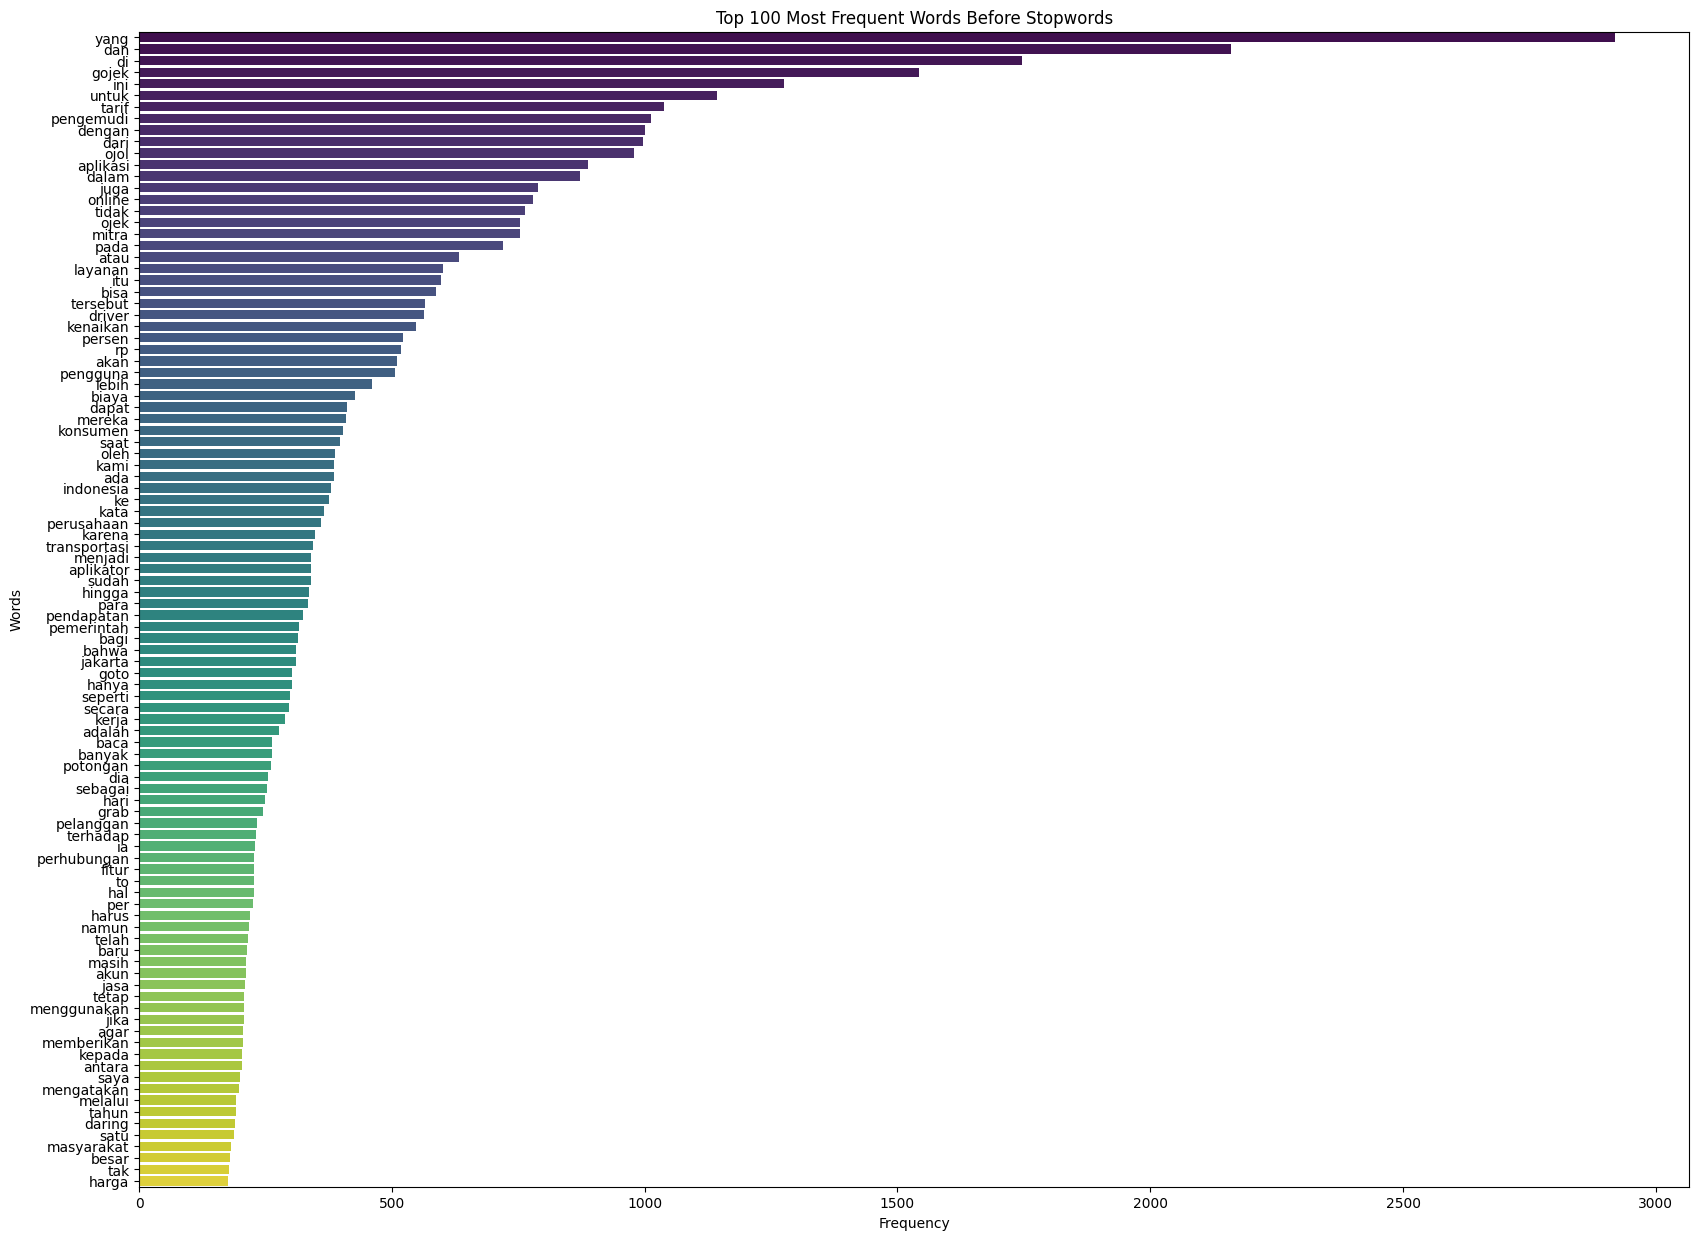

In [29]:
from collections import Counter

# Menggabungkan semua teks dalam kolom 'cleaned_content' menjadi satu string
all_words = ' '.join(gojek_news_df['cleaned_content'])

# Menghitung frekuensi kata dan mendapatkan top 100
word_freq = Counter(all_words.split())
top_100_words = dict(word_freq.most_common(100))

# Menyimpan frekuensi kata sebagai DataFrame
top_100_df = pd.DataFrame(top_100_words.items(), columns=['word', 'frequency'])

# Mengurutkan DataFrame berdasarkan frekuensi
top_100_df = top_100_df.sort_values(by='frequency', ascending=False)

# Membuat diagram batang
plt.figure(figsize=(20, 15))
sns.barplot(data=top_100_df, x='frequency', y='word', palette='viridis')
plt.title("Top 100 Most Frequent Words Before Stopwords")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

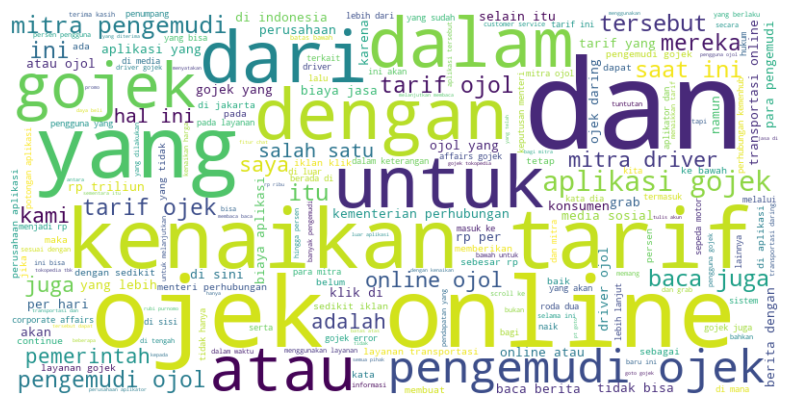

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membuat WordCloud dari seluruh kata dalam kolom 'content'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'gojek_news_df_before_stopwords.csv'
gojek_news_df.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke gojek_news_df_before_stopwords.csv


In [32]:
# Menyimpan DataFrame ke dalam file Excel
file_path = 'gojek_news_df_before_stopwords.xlsx'
gojek_news_df.to_excel(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke gojek_news_df_before_stopwords.xlsx


## Text Analysis (Setelah Stopwords)

In [33]:
import requests
# Membuat DataFrame baru dengan kolom-kolom yang dipilih dari gojek_news_df
gojek_news_df_with_gojek = gojek_news_df[['link', 'judul','penerbit', 'tanggal', 'content', 'cleaned_content', 'tahun', 'wordCount']].copy()

# Membuat DataFrame baru dengan kolom-kolom yang dipilih dari gojek_news_df
gojek_news_df_without_gojek = gojek_news_df[['link', 'judul','penerbit', 'tanggal', 'content', 'cleaned_content', 'tahun', 'wordCount']].copy()

# Unduh daftar stopwords dari URL
url = 'https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt'
response = requests.get(url)

# Simpan daftar stopwords ke file lokal
with open('id_stopwords.txt', 'w', encoding='utf-8') as file:
    file.write(response.text)

# Baca stopwords dari file
with open('id_stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords_id = file.read().splitlines()

# Tambahkan stopwords khusus Anda
custom_stopwords = ["baca", "klik", "berita", "gojek", "brwa", "the", "isra", "mikraj", "rozaq qosdy", "rozaq", "qosdy", "anggi", "welem", "of", "ustadz abdul", "ustadz", "abdul","darmawi", "sri", "elisnawati", "nurmis", "syarariyah", "musmulyadi", "to", "scroll", "baca"]
stopwords_id.extend(custom_stopwords)

# Menghapus duplikat (jika ada)
stopwords_id = list(set(stopwords_id))

# Menampilkan informasi stopwords
print(f"Total {len(stopwords_id)} kata stopwords (termasuk custom stopwords)")
print("Contoh stopwords:", stopwords_id[:10] + ["..."] + custom_stopwords)


Total 782 kata stopwords (termasuk custom stopwords)
Contoh stopwords: ['kita', 'hal', 'khususnya', 'pun', 'jangan', 'mendapat', 'kok', 'mengibaratkannya', 'pula', 'memperkirakan', '...', 'baca', 'klik', 'berita', 'gojek', 'brwa', 'the', 'isra', 'mikraj', 'rozaq qosdy', 'rozaq', 'qosdy', 'anggi', 'welem', 'of', 'ustadz abdul', 'ustadz', 'abdul', 'darmawi', 'sri', 'elisnawati', 'nurmis', 'syarariyah', 'musmulyadi', 'to', 'scroll', 'baca']


In [34]:
def remove_stopwords(text, base_stopwords, extra_stopwords=None):
    base_stopwords = set(word.lower() for word in base_stopwords)
    if extra_stopwords:
        extra_stopwords = set(word.lower() for word in extra_stopwords)
        all_stopwords = base_stopwords.union(extra_stopwords)
    else:
        all_stopwords = base_stopwords

    words = text.split()
    filtered_words = [word for word in words if word.lower() not in all_stopwords]
    return ' '.join(filtered_words)


In [35]:
def stopword_preprocessing_pipeline(df, stopwords_base, extra_stopwords=None):
    df = df.copy()  # Hindari mengubah DataFrame asli
    df['content_without_stopwords'] = df['cleaned_content'].apply(
        lambda x: remove_stopwords(x, stopwords_base, extra_stopwords)
    )
    return df

In [36]:
# Versi default (tanpa menghapus "gojek")
gojek_news_df_with_gojek = stopword_preprocessing_pipeline(gojek_news_df_with_gojek, stopwords_id)

gojek_news_df_without_gojek['cleaned_content'] = gojek_news_df_without_gojek['cleaned_content'].str.lower()
# Versi dengan tambahan kata "gojek" dihapus
gojek_news_df_without_gojek = stopword_preprocessing_pipeline(gojek_news_df_without_gojek, stopwords_id, extra_stopwords=["gojek", "gojek"])

gojek_news_df_with_gojek[['cleaned_content', 'content_without_stopwords']]

cleaned_content  \
0    yogyakarta pemerintah melalui kementerian perh...   
1    jakarta gizmologi pemerintah telah menetapkan ...   
2    sejumlah warganet mengeluhkan aplikasi gojek y...   
3    hampir pengemudi ojek online atau ojol bekerja...   
4    satu hal yang tak bisa dipungkiri adalah bahwa...   
..                                                 ...   
295  hai gojekers update fitur chat terbaru yang di...   
296  jakarta sejumlah warganet ramai mengeluhkan ap...   
297  bagi para pengemudi ojek online ojol dan mitra...   
298  sebuah unggahan yang menyatakan penumpang ojek...   
299  dirjen perhubungan darat kementerian perhubung...   

                             content_without_stopwords  
0    yogyakarta pemerintah kementerian perhubungan ...  
1    jakarta gizmologi pemerintah menetapkan kenaik...  
2    warganet mengeluhkan aplikasi eror keluhankelu...  
3    pengemudi ojek online ojol libur sepekan berda...  
4    dipungkiri pengemudi ojol tulang punggung laya...  
..                                                 ...  
295  hai gojekers update fitur chat terbaru ditungg...  
296  jakarta warganet ramai mengeluhkan aplikasi er...  
297  pengemudi ojek online ojol mitra penjual merge...  
298  unggahan penumpang ojek online ojol rating nil...  
299  dirjen perhubungan darat kementerian perhubung...  

[300 rows x 2 columns]

In [37]:
gojek_news_df_without_gojek[['cleaned_content', 'content_without_stopwords']]

cleaned_content  \
0    yogyakarta pemerintah melalui kementerian perh...   
1    jakarta gizmologi pemerintah telah menetapkan ...   
2    sejumlah warganet mengeluhkan aplikasi gojek y...   
3    hampir pengemudi ojek online atau ojol bekerja...   
4    satu hal yang tak bisa dipungkiri adalah bahwa...   
..                                                 ...   
295  hai gojekers update fitur chat terbaru yang di...   
296  jakarta sejumlah warganet ramai mengeluhkan ap...   
297  bagi para pengemudi ojek online ojol dan mitra...   
298  sebuah unggahan yang menyatakan penumpang ojek...   
299  dirjen perhubungan darat kementerian perhubung...   

                             content_without_stopwords  
0    yogyakarta pemerintah kementerian perhubungan ...  
1    jakarta gizmologi pemerintah menetapkan kenaik...  
2    warganet mengeluhkan aplikasi eror keluhankelu...  
3    pengemudi ojek online ojol libur sepekan berda...  
4    dipungkiri pengemudi ojol tulang punggung laya...  
..                                                 ...  
295  hai gojekers update fitur chat terbaru ditungg...  
296  jakarta warganet ramai mengeluhkan aplikasi er...  
297  pengemudi ojek online ojol mitra penjual merge...  
298  unggahan penumpang ojek online ojol rating nil...  
299  dirjen perhubungan darat kementerian perhubung...  

[300 rows x 2 columns]

/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/2814662719.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_100_with_gojek_df, x='frequency', y='word', palette='Greens_d')


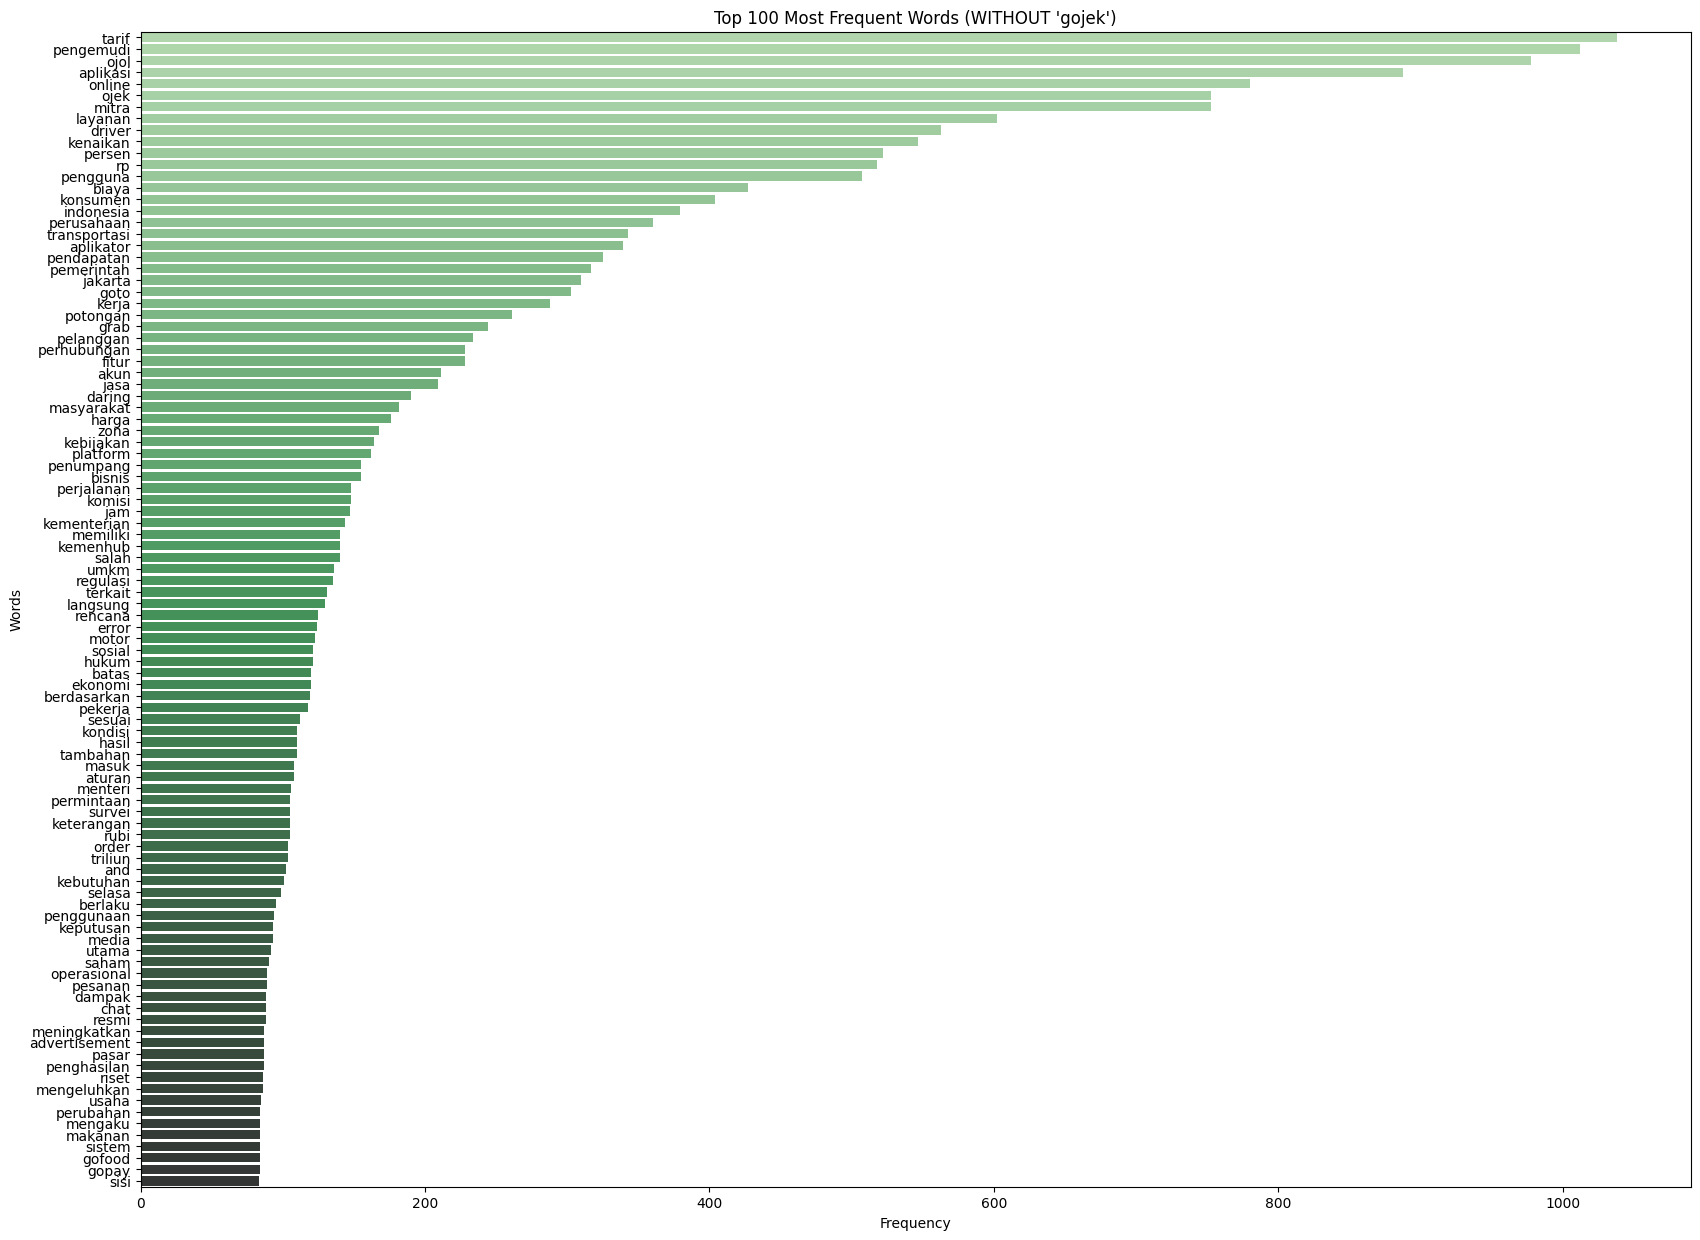

In [38]:
# Gabungkan semua kata menjadi satu string
all_words_without_gojek = ' '.join(gojek_news_df_with_gojek['content_without_stopwords'])

# Hitung frekuensi kata
word_freq_without_gojek = Counter(all_words_without_gojek.split())
top_100_with_gojek = dict(word_freq_without_gojek.most_common(100))

# Simpan ke DataFrame
top_100_with_gojek_df = pd.DataFrame(top_100_with_gojek.items(), columns=['word', 'frequency'])
top_100_with_gojek_df = top_100_with_gojek_df.sort_values(by='frequency', ascending=False)

# Visualisasi
plt.figure(figsize=(20, 15))
sns.barplot(data=top_100_with_gojek_df, x='frequency', y='word', palette='Greens_d')
plt.title("Top 100 Most Frequent Words (WITHOUT 'gojek')")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [39]:
# Melihat keseluruhan baris

# Mengatur pandas agar menampilkan seluruh baris DataFrame
pd.set_option('display.max_rows', None)

# Menampilkan seluruh isi DataFrame
print(top_100_with_gojek_df)

# Setelah selesai, Anda bisa mengembalikan pengaturan agar hanya menampilkan sebagian baris
pd.reset_option('display.max_rows')

             word  frequency
0           tarif       1038
1       pengemudi       1012
2            ojol        978
3        aplikasi        888
4          online        780
5            ojek        753
6           mitra        753
7         layanan        602
8          driver        563
9        kenaikan        547
10         persen        522
11             rp        518
12       pengguna        507
13          biaya        427
14       konsumen        404
15      indonesia        379
16     perusahaan        360
17   transportasi        343
18      aplikator        339
19     pendapatan        325
20     pemerintah        317
21        jakarta        310
22           goto        303
23          kerja        288
24       potongan        261
25           grab        244
26      pelanggan        234
27    perhubungan        228
28          fitur        228
29           akun        211
30           jasa        209
31         daring        190
32     masyarakat        182
33          ha

/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/518906513.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_100_without_gojek_df, x='frequency', y='word', palette='Greens_d')


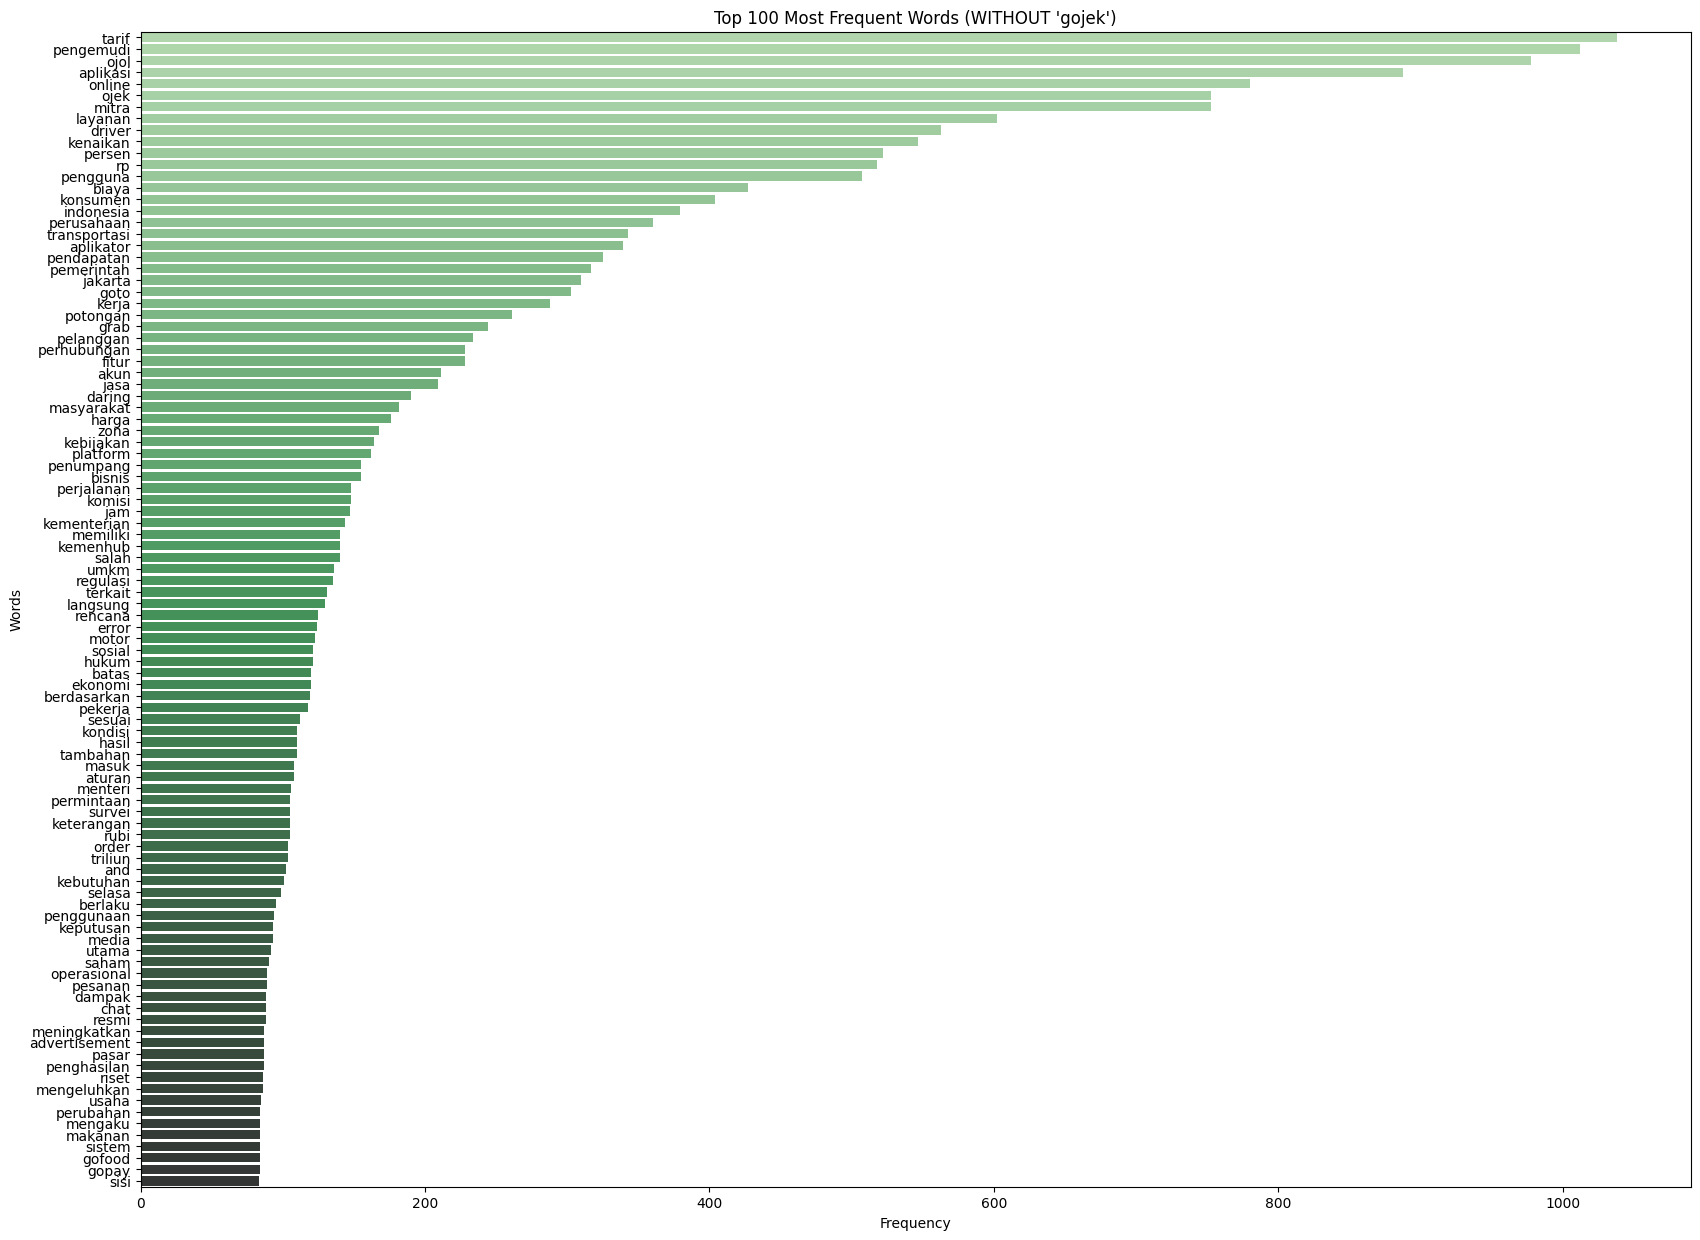

In [40]:
# Gabungkan semua kata menjadi satu string
all_words_without_gojek = ' '.join(gojek_news_df_without_gojek['content_without_stopwords'])

# Hitung frekuensi kata
word_freq_without_gojek = Counter(all_words_without_gojek.split())
top_100_without_gojek = dict(word_freq_without_gojek.most_common(100))

# Simpan ke DataFrame
top_100_without_gojek_df = pd.DataFrame(top_100_without_gojek.items(), columns=['word', 'frequency'])
top_100_without_gojek_df = top_100_without_gojek_df.sort_values(by='frequency', ascending=False)

# Visualisasi
plt.figure(figsize=(20, 15))
sns.barplot(data=top_100_without_gojek_df, x='frequency', y='word', palette='Greens_d')
plt.title("Top 100 Most Frequent Words (WITHOUT 'gojek')")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [41]:
# Melihat keseluruhan baris

# Mengatur pandas agar menampilkan seluruh baris DataFrame
pd.set_option('display.max_rows', None)

# Menampilkan seluruh isi DataFrame
print(top_100_without_gojek_df)

# Setelah selesai, Anda bisa mengembalikan pengaturan agar hanya menampilkan sebagian baris
pd.reset_option('display.max_rows')

             word  frequency
0           tarif       1038
1       pengemudi       1012
2            ojol        978
3        aplikasi        888
4          online        780
5            ojek        753
6           mitra        753
7         layanan        602
8          driver        563
9        kenaikan        547
10         persen        522
11             rp        518
12       pengguna        507
13          biaya        427
14       konsumen        404
15      indonesia        379
16     perusahaan        360
17   transportasi        343
18      aplikator        339
19     pendapatan        325
20     pemerintah        317
21        jakarta        310
22           goto        303
23          kerja        288
24       potongan        261
25           grab        244
26      pelanggan        234
27    perhubungan        228
28          fitur        228
29           akun        211
30           jasa        209
31         daring        190
32     masyarakat        182
33          ha

/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/725902331.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_with_gojek_df, x='frequency', y='word', palette='viridis')


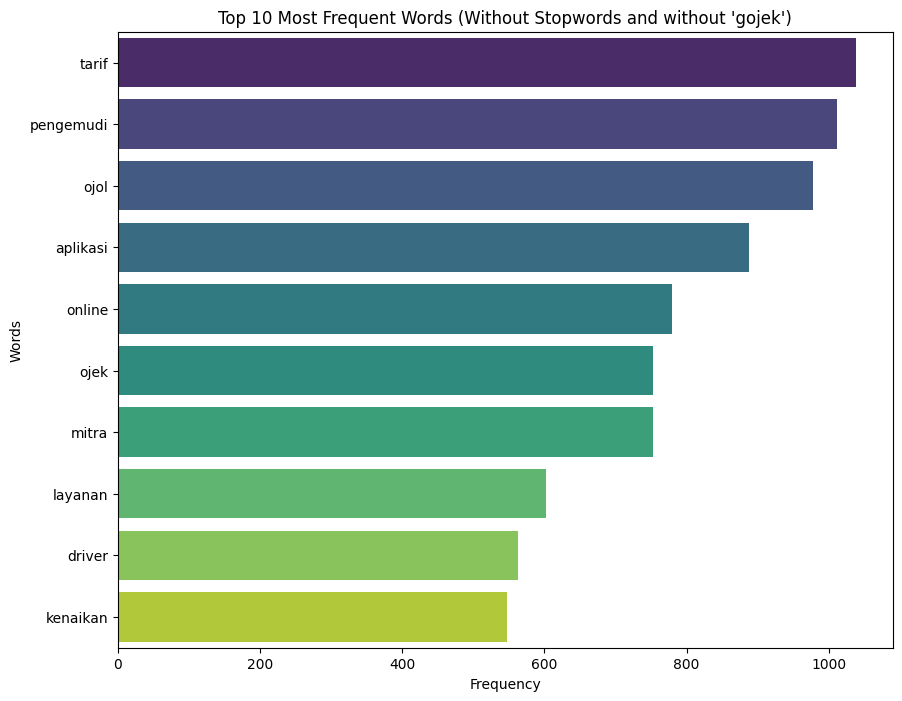

In [42]:
# Kalau mau ambil top 10 dari tanpa gojek
top_10_with_gojek_df = top_100_with_gojek_df.head(10)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_10_with_gojek_df, x='frequency', y='word', palette='viridis')
plt.title("Top 10 Most Frequent Words (Without Stopwords and without 'gojek')")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/3797783878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_without_gojek_df, x='frequency', y='word', palette='viridis')


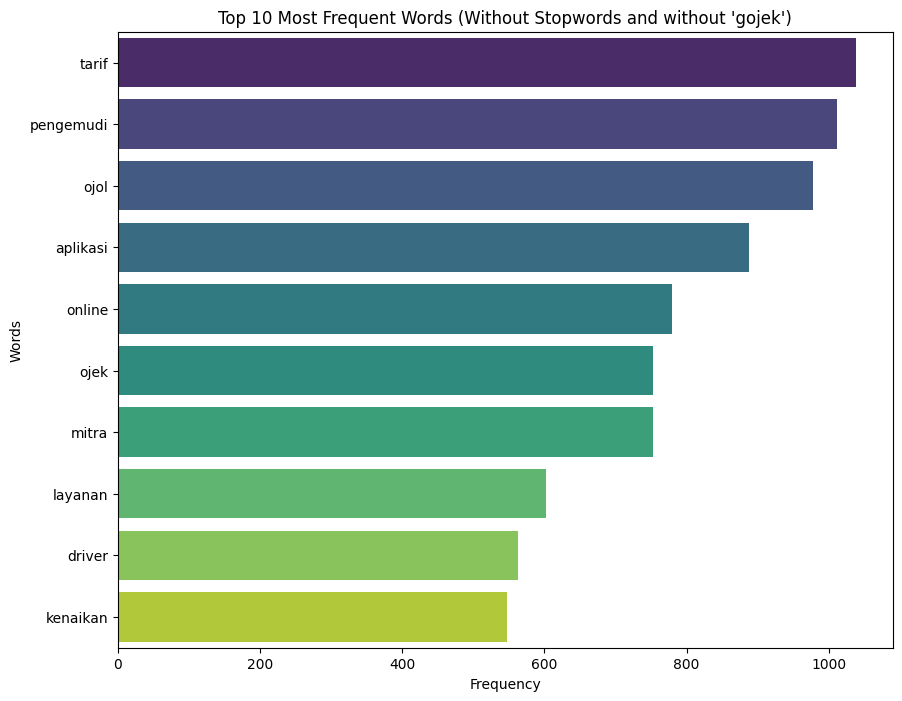

In [43]:
# Kalau mau ambil top 10 dari tanpa gojek
top_10_without_gojek_df = top_100_without_gojek_df.head(10)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_10_without_gojek_df, x='frequency', y='word', palette='viridis')
plt.title("Top 10 Most Frequent Words (Without Stopwords and without 'gojek')")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


In [44]:
# Menambahkan kolom wordcount_after_stopwords
gojek_news_df_with_gojek['wordcount_after_stopwords'] = gojek_news_df_with_gojek['content_without_stopwords'].apply(lambda x: len(x.split()))

In [45]:
gojek_news_df_with_gojek

link  \
0    https://beritajatim.com/tarif-ojol-naik-15-per...   
1    https://gizmologi.id/news/survei-tolak-kenaika...   
2    https://katadata.co.id/digital/startup/63c159e...   
3    https://katadata.co.id/digital/startup/64df003...   
4    https://kumparan.com/odjie-samroji/nasib-penge...   
..                                                 ...   
295  https://www.gojek.com/blog/gojek/update-fitur-...   
296  https://www.liputan6.com/tekno/read/5523551/wa...   
297  https://kumparan.com/kumparanbisnis/koalisi-oj...   
298  https://www.kompas.com/tren/read/2023/12/13/07...   
299  https://www.cnnindonesia.com/ekonomi/202507021...   

                                                 judul       penerbit  \
0           pakar transportasi ingatkan dampak negatif    Beritajatim   
1              survei tolak kenaikan tarif ojol online      Gizmologi   
2    aplikasi __gojek__ error, warganet keluhkan sa...       katadata   
3    riset hampir driver ojol kerja tanpa libur, ja...       Katadata   
4    nasib pengemudi ojol online, antara harapan da...       kumparan   
..                                                 ...            ...   
295  kirim pesan lebih praktis dengan update fitur ...     Gojek Blog   
296  warganet keluhkan aplikasi __gojek__ error di ...   Liputan6.com   
297  koalisi ojol nasional tolak wacana merger grab...       kumparan   
298  driver __gojek__ bisa nilai customer, ini risi...     Kompas.com   
299  kemenhub ralat soal tarif ojol naik persen, se...  CNN Indonesia   

       tanggal                                            content  \
0   2025-02-07  Yogyakarta (beritajatim.com)– Pemerintah melal...   
1   2025-02-03  Jakarta, Gizmologi – Pemerintah telah menetapk...   
2          NaT  Sejumlah warganet mengeluhkan aplikasi Gojek y...   
3          NaT  Hampir 50% pengemudi ojek online atau ojol bek...   
4          NaT  Satu hal yang tak bisa dipungkiri adalah bahwa...   
..         ...                                                ...   
295        NaT  Hai Gojekers,\n\n\n\nUpdate fitur chat terbaru...   
296 2024-07-02  Liputan6.com, Jakarta - Sejumlah warganet rama...   
297        NaT  “Bagi para pengemudi ojek online (ojol) dan mi...   
298        NaT  KOMPAS.com - Sebuah unggahan yang menyatakan p...   
299 2025-03-03  --\n\nDirjen Perhubungan Darat Kementerian Per...   

                                       cleaned_content   tahun  wordCount  \
0    yogyakarta pemerintah melalui kementerian perh...  2025.0        328   
1    jakarta gizmologi pemerintah telah menetapkan ...  2025.0        385   
2    sejumlah warganet mengeluhkan aplikasi gojek y...     NaN        298   
3    hampir pengemudi ojek online atau ojol bekerja...     NaN        250   
4    satu hal yang tak bisa dipungkiri adalah bahwa...     NaN         87   
..                                                 ...     ...        ...   
295  hai gojekers update fitur chat terbaru yang di...     NaN        343   
296  jakarta sejumlah warganet ramai mengeluhkan ap...  2024.0        102   
297  bagi para pengemudi ojek online ojol dan mitra...     NaN         39   
298  sebuah unggahan yang menyatakan penumpang ojek...     NaN        295   
299  dirjen perhubungan darat kementerian perhubung...  2025.0        255   

                             content_without_stopwords  \
0    yogyakarta pemerintah kementerian perhubungan ...   
1    jakarta gizmologi pemerintah menetapkan kenaik...   
2    warganet mengeluhkan aplikasi eror keluhankelu...   
3    pengemudi ojek online ojol libur sepekan berda...   
4    dipungkiri pengemudi ojol tulang punggung laya...   
..                                                 ...   
295  hai gojekers update fitur chat terbaru ditungg...   
296  jakarta warganet ramai mengeluhkan aplikasi er...   
297  pengemudi ojek online ojol mitra penjual merge...   
298  unggahan penumpang ojek online ojol rating nil...   
299  dirjen perhubungan darat kementerian perhubung...   

     wordcount_after_stop

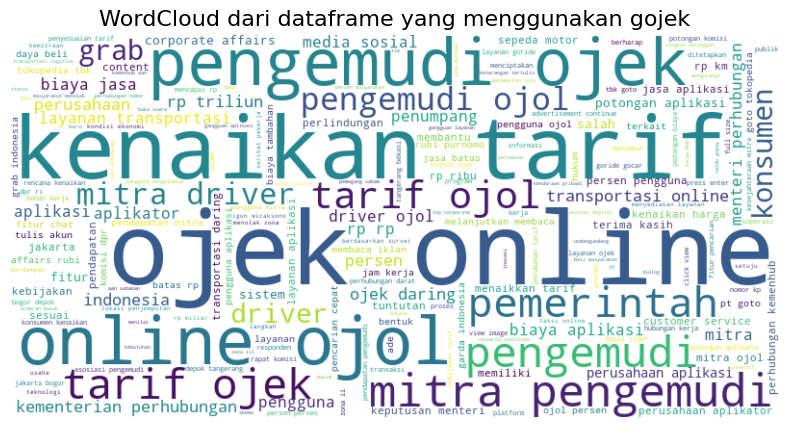

In [46]:
# Gabungkan semua teks dari kolom 'content_without_stopwords' menjadi satu string
text = ' '.join(gojek_news_df_with_gojek['content_without_stopwords'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menghilangkan sumbu
plt.title('WordCloud dari dataframe yang menggunakan gojek', fontsize=16)
plt.show()

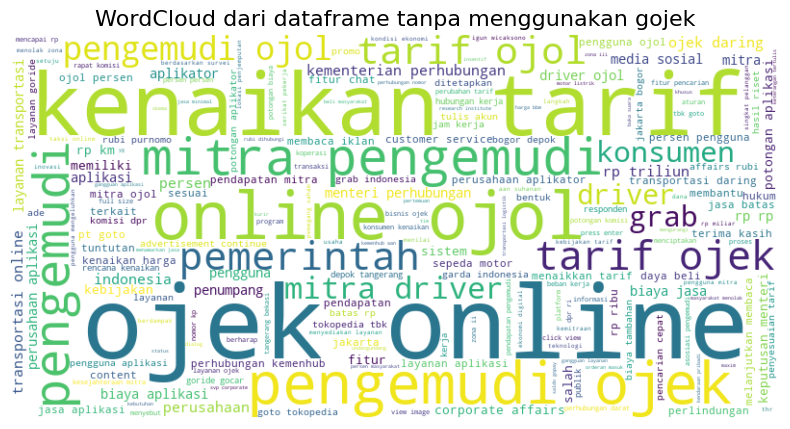

In [47]:
# Gabungkan semua teks dari kolom 'content_without_stopwords' menjadi satu string
text = ' '.join(gojek_news_df_without_gojek['content_without_stopwords'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menghilangkan sumbu
plt.title('WordCloud dari dataframe tanpa menggunakan gojek', fontsize=16)
plt.show()

In [48]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'gojek_news_df_after_stopwords.csv'
gojek_news_df_with_gojek.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke gojek_news_df_after_stopwords.csv


In [49]:
# Menyimpan DataFrame ke dalam file Excel
file_path = 'gojek_news_df_after_stopwords.xlsx'
gojek_news_df_with_gojek.to_excel(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke gojek_news_df_after_stopwords.xlsx


## Stemming

In [50]:
print(gojek_news_df_with_gojek.columns.tolist())


['link', 'judul', 'penerbit', 'tanggal', 'content', 'cleaned_content', 'tahun', 'wordCount', 'content_without_stopwords', 'wordcount_after_stopwords']


In [51]:
# Mengunduh library untuk stemming Bahasa Indonesia
!pip install PySastrawi

In [52]:
# Import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [53]:
# Fungsi untuk stemming
def stemming_indonesia(text):
    if text is not None:
        # Lakukan stemming dan kembalikan hasilnya
        return stemmer.stem(text)
    return ''

In [54]:
# Terapkan stemming pada kolom 'content_without_stopwords'
gojek_news_df_with_gojek['content_stem_without_stopwords'] = gojek_news_df_with_gojek['content_without_stopwords'].apply(stemming_indonesia)

# Menampilkan hasil untuk beberapa baris
gojek_news_df_with_gojek.loc[0:3, ['content_without_stopwords', 'content_stem_without_stopwords']]

content_without_stopwords  \
0  yogyakarta pemerintah kementerian perhubungan ...   
1  jakarta gizmologi pemerintah menetapkan kenaik...   
2  warganet mengeluhkan aplikasi eror keluhankelu...   
3  pengemudi ojek online ojol libur sepekan berda...   

                      content_stem_without_stopwords  
0  yogyakarta perintah menteri hubung bijak naik ...  
1  jakarta gizmologi perintah tetap naik tarif oj...  
2  warganet keluh aplikasi eror keluhankeluhan tu...  
3  kemudi ojek online ojol libur pek dasar survei...

In [55]:
# Terapkan stemming pada kolom 'content_without_stopwords'
gojek_news_df_without_gojek['content_stem_without_stopwords'] = gojek_news_df_without_gojek['content_without_stopwords'].apply(stemming_indonesia)

# Menampilkan hasil untuk beberapa baris
gojek_news_df_without_gojek.loc[0:3, ['content_without_stopwords', 'content_stem_without_stopwords']]

content_without_stopwords  \
0  yogyakarta pemerintah kementerian perhubungan ...   
1  jakarta gizmologi pemerintah menetapkan kenaik...   
2  warganet mengeluhkan aplikasi eror keluhankelu...   
3  pengemudi ojek online ojol libur sepekan berda...   

                      content_stem_without_stopwords  
0  yogyakarta perintah menteri hubung bijak naik ...  
1  jakarta gizmologi perintah tetap naik tarif oj...  
2  warganet keluh aplikasi eror keluhankeluhan tu...  
3  kemudi ojek online ojol libur pek dasar survei...

In [56]:
gojek_news_df_with_gojek['wordcount_stem_without_stopwords'] = gojek_news_df_with_gojek['content_stem_without_stopwords'].apply(lambda x: len(x.split()))

In [57]:
gojek_news_df_with_gojek.loc[:,['judul', 'content', 'content_stem_without_stopwords', 'wordcount_stem_without_stopwords']]

judul  \
0           pakar transportasi ingatkan dampak negatif   
1              survei tolak kenaikan tarif ojol online   
2    aplikasi __gojek__ error, warganet keluhkan sa...   
3    riset hampir driver ojol kerja tanpa libur, ja...   
4    nasib pengemudi ojol online, antara harapan da...   
..                                                 ...   
295  kirim pesan lebih praktis dengan update fitur ...   
296  warganet keluhkan aplikasi __gojek__ error di ...   
297  koalisi ojol nasional tolak wacana merger grab...   
298  driver __gojek__ bisa nilai customer, ini risi...   
299  kemenhub ralat soal tarif ojol naik persen, se...   

                                               content  \
0    Yogyakarta (beritajatim.com)– Pemerintah melal...   
1    Jakarta, Gizmologi – Pemerintah telah menetapk...   
2    Sejumlah warganet mengeluhkan aplikasi Gojek y...   
3    Hampir 50% pengemudi ojek online atau ojol bek...   
4    Satu hal yang tak bisa dipungkiri adalah bahwa...   
..                                                 ...   
295  Hai Gojekers,\n\n\n\nUpdate fitur chat terbaru...   
296  Liputan6.com, Jakarta - Sejumlah warganet rama...   
297  “Bagi para pengemudi ojek online (ojol) dan mi...   
298  KOMPAS.com - Sebuah unggahan yang menyatakan p...   
299  --\n\nDirjen Perhubungan Darat Kementerian Per...   

                        content_stem_without_stopwords  \
0    yogyakarta perintah menteri hubung bijak naik ...   
1    jakarta gizmologi perintah tetap naik tarif oj...   
2    warganet keluh aplikasi eror keluhankeluhan tu...   
3    kemudi ojek online ojol libur pek dasar survei...   
4    dipungkiri kemudi ojol tulang punggung layan a...   
..                                                 ...   
295  hai gojekers update fitur chat baru tunggu had...   
296  jakarta warganet ramai keluh aplikasi error me...   
297  kemudi ojek online ojol mitra jual merger damp...   
298  unggah tumpang ojek online ojol rating nilai b...   
299  dirjen hubung darat menteri hubung kemenhub aa...   

     wordcount_stem_without_stopwords  
0                                 196  
1                                 266  
2                                 149  
3                                 157  
4                                  35  
..                                ...  
295                               193  
296                                48  
297                                24  
298                               162  
299                               154  

[300 rows x 4 columns]

/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/785101812.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words, palette='viridis')


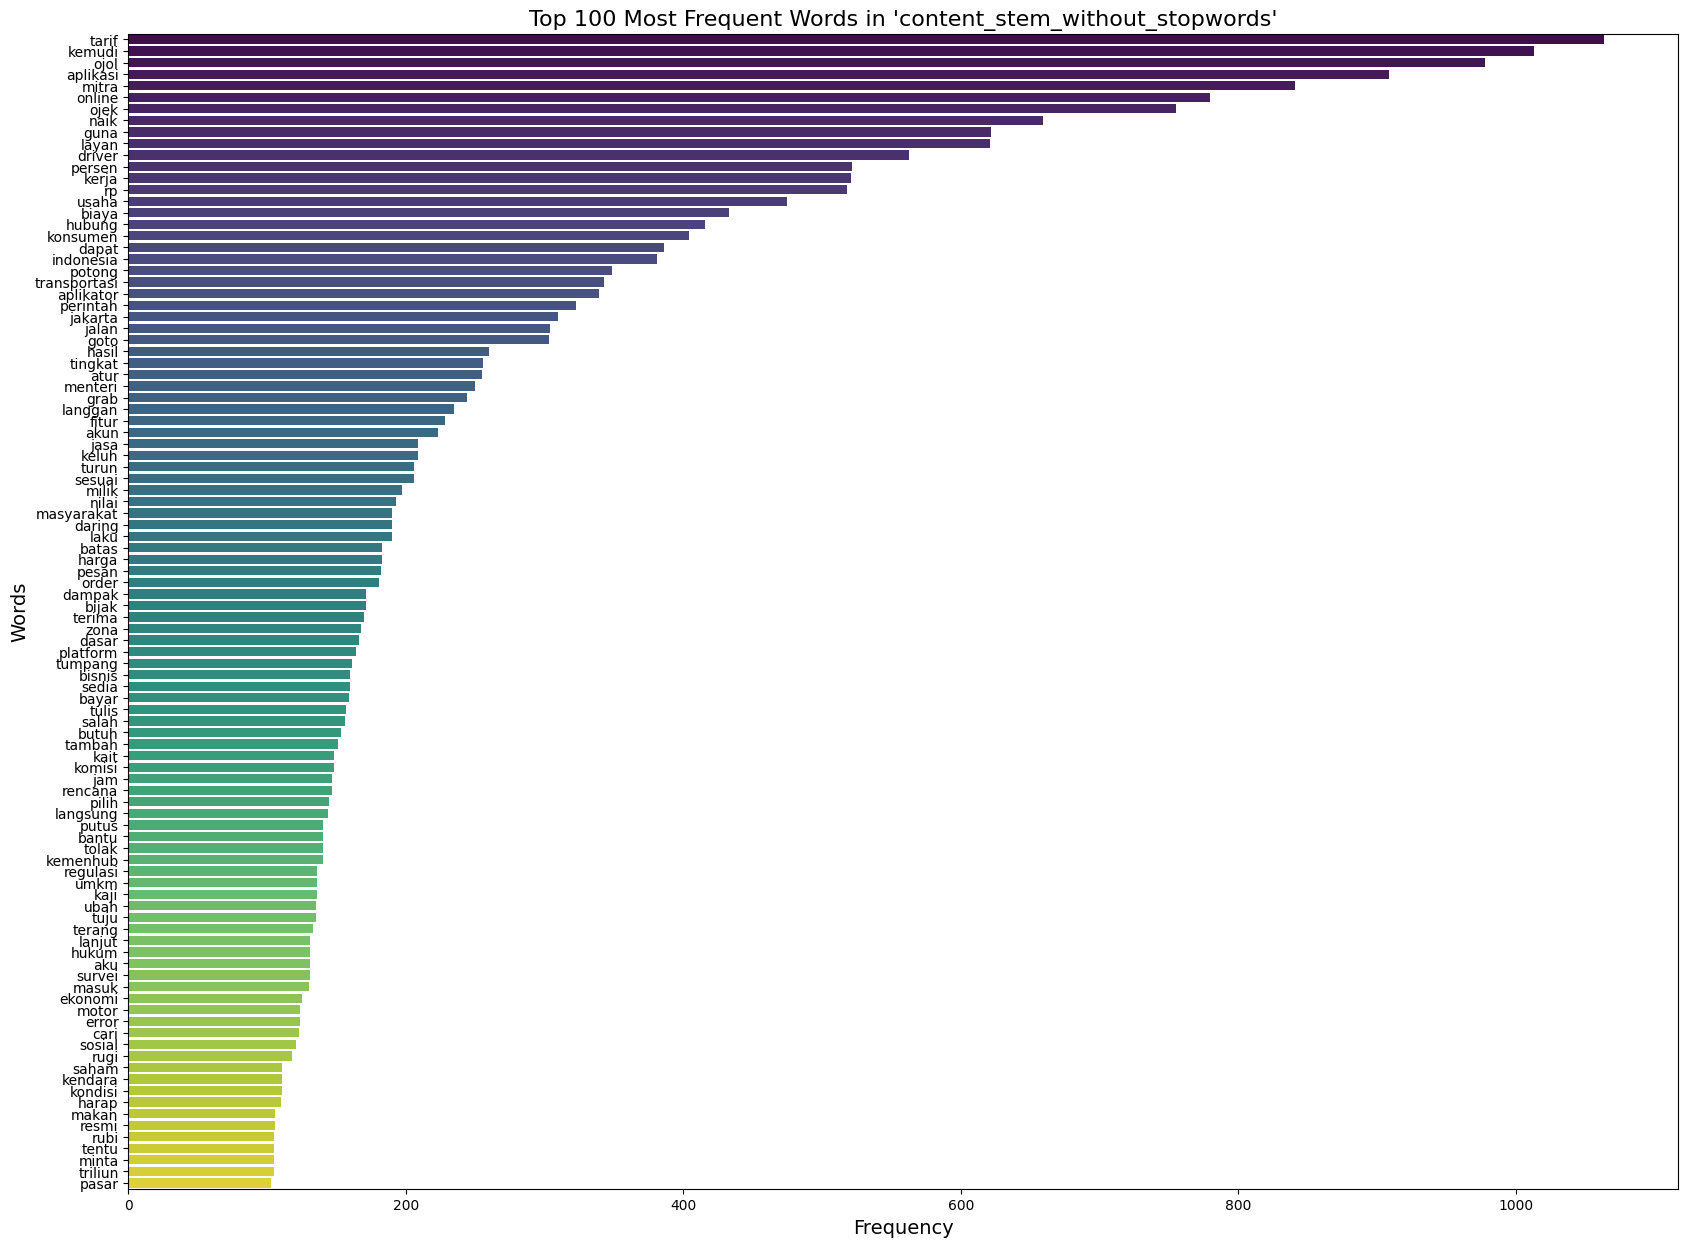

In [58]:
from collections import Counter

# Gabungkan semua teks dalam kolom 'content_stem_without_stopwords' menjadi satu string
all_words = ' '.join(gojek_news_df_with_gojek['content_stem_without_stopwords'].tolist())

# Pisahkan string menjadi daftar kata
word_list = all_words.split()

# Hitung frekuensi kata
word_freq = Counter(word_list)

# Konversi hasil ke DataFrame
freq_stem_without_stopwords = pd.DataFrame(word_freq.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

# Ambil top 100 kata yang paling sering muncul
top_n = 100
top_words = freq_stem_without_stopwords.head(top_n)

# Plot hasil frekuensi kata
plt.figure(figsize=(20, 15))
sns.barplot(x='count', y='word', data=top_words, palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in 'content_stem_without_stopwords'", fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()

/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/3945975635.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words, palette='viridis')


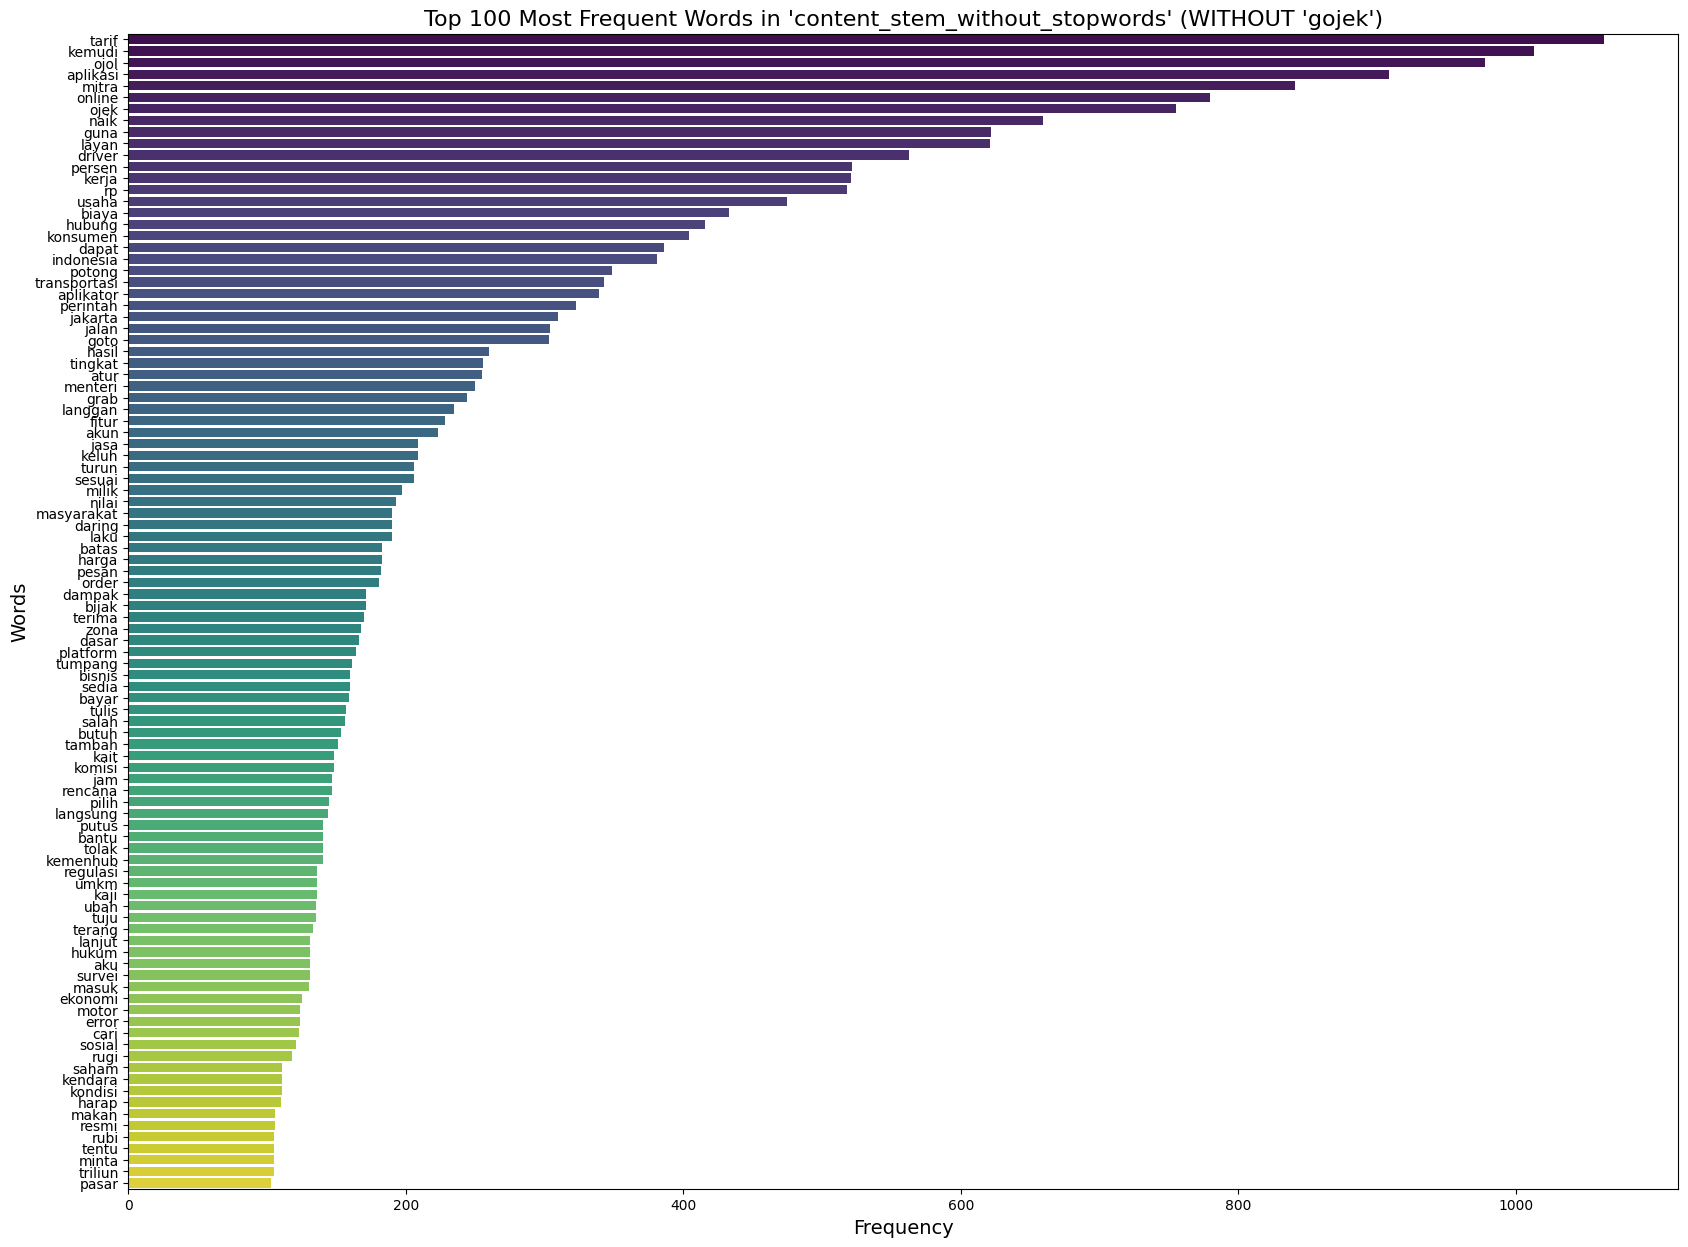

In [59]:

# Gabungkan semua teks dalam kolom 'content_stem_without_stopwords' dari DataFrame TANPA gojek
all_words = ' '.join(gojek_news_df_without_gojek['content_stem_without_stopwords'].tolist())

# Pisahkan string menjadi daftar kata
word_list = all_words.split()

# Hitung frekuensi kata
word_freq = Counter(word_list)

# Konversi hasil ke DataFrame
freq_stem_without_stopwords = pd.DataFrame(word_freq.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

# Ambil top 100 kata yang paling sering muncul
top_n = 100
top_words = freq_stem_without_stopwords.head(top_n)

# Plot hasil frekuensi kata
plt.figure(figsize=(20, 15))
sns.barplot(x='count', y='word', data=top_words, palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in 'content_stem_without_stopwords' (WITHOUT 'gojek')", fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()

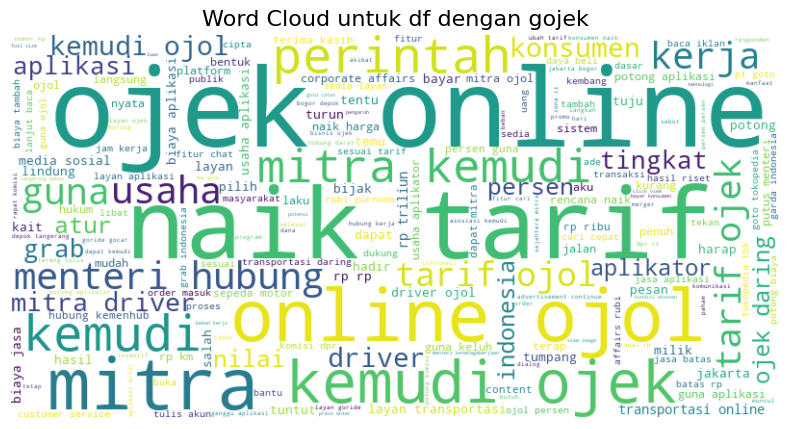

In [60]:
# Buat Word Cloud untuk 'content_stem_without_stopwords'
wordcloud_stem = WordCloud(width=800, height=400, background_color='white').generate(' '.join(gojek_news_df_with_gojek['content_stem_without_stopwords']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stem, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk df dengan gojek', fontsize=16)
plt.show()

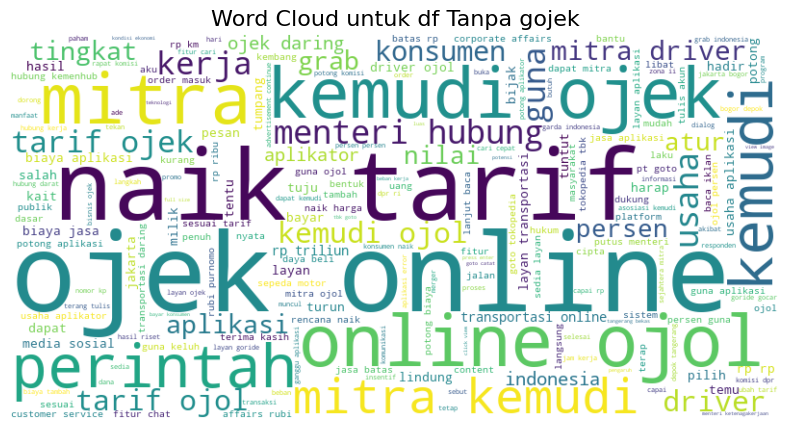

In [61]:
# Buat Word Cloud untuk 'content_stem_without_stopwords'
wordcloud_stem_without_gojek = WordCloud(width=800, height=400, background_color='white').generate(' '.join(gojek_news_df_without_gojek['content_stem_without_stopwords']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stem_without_gojek, interpolation='bilinear')  # <-- Ini sudah benar!
plt.axis('off')
plt.title('Word Cloud untuk df Tanpa gojek', fontsize=16)
plt.show()

In [62]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'gojek_news_df_after_stopwords_stemming.csv'
gojek_news_df_with_gojek.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke gojek_news_df_after_stopwords_stemming.csv


In [63]:
# Menyimpan DataFrame ke dalam file Excel
file_path = 'gojek_news_df_after_stopwords_stemming.xlsx'
gojek_news_df_with_gojek.to_excel(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke gojek_news_df_after_stopwords_stemming.xlsx


## Lemmatization

In [64]:
from nltk.stem import WordNetLemmatizer

# Unduh data yang diperlukan untuk lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

# Buat objek lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/irfan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/irfan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [65]:
# Fungsi untuk melakukan lemmatization
def lemmatize_indonesia(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [66]:
# Terapkan lemmatization pada kolom 'content_without_stopwords'
gojek_news_df_with_gojek['content_lemmatized'] = gojek_news_df_with_gojek['content_stem_without_stopwords'].apply(lemmatize_indonesia)

# Terapkan lemmatization pada kolom 'content_without_stopwords'
gojek_news_df_without_gojek['content_lemmatized'] = gojek_news_df_without_gojek['content_stem_without_stopwords'].apply(lemmatize_indonesia)

# Menampilkan hasil untuk beberapa baris
gojek_news_df_with_gojek.loc[0:3, ['content_stem_without_stopwords', 'content_lemmatized']]

content_stem_without_stopwords  \
0  yogyakarta perintah menteri hubung bijak naik ...   
1  jakarta gizmologi perintah tetap naik tarif oj...   
2  warganet keluh aplikasi eror keluhankeluhan tu...   
3  kemudi ojek online ojol libur pek dasar survei...   

                                  content_lemmatized  
0  yogyakarta perintah menteri hubung bijak naik ...  
1  jakarta gizmologi perintah tetap naik tarif oj...  
2  warganet keluh aplikasi eror keluhankeluhan tu...  
3  kemudi ojek online ojol libur pek dasar survei...

In [67]:
gojek_news_df_with_gojek['wordcount_lemmatized'] = gojek_news_df_with_gojek['content_lemmatized'].apply(lambda x: len(x.split()))

In [68]:
gojek_news_df_with_gojek.loc[:,['judul', 'content', 'wordCount', 'content_lemmatized', 'wordcount_lemmatized']]

judul  \
0           pakar transportasi ingatkan dampak negatif   
1              survei tolak kenaikan tarif ojol online   
2    aplikasi __gojek__ error, warganet keluhkan sa...   
3    riset hampir driver ojol kerja tanpa libur, ja...   
4    nasib pengemudi ojol online, antara harapan da...   
..                                                 ...   
295  kirim pesan lebih praktis dengan update fitur ...   
296  warganet keluhkan aplikasi __gojek__ error di ...   
297  koalisi ojol nasional tolak wacana merger grab...   
298  driver __gojek__ bisa nilai customer, ini risi...   
299  kemenhub ralat soal tarif ojol naik persen, se...   

                                               content  wordCount  \
0    Yogyakarta (beritajatim.com)– Pemerintah melal...        328   
1    Jakarta, Gizmologi – Pemerintah telah menetapk...        385   
2    Sejumlah warganet mengeluhkan aplikasi Gojek y...        298   
3    Hampir 50% pengemudi ojek online atau ojol bek...        250   
4    Satu hal yang tak bisa dipungkiri adalah bahwa...         87   
..                                                 ...        ...   
295  Hai Gojekers,\n\n\n\nUpdate fitur chat terbaru...        343   
296  Liputan6.com, Jakarta - Sejumlah warganet rama...        102   
297  “Bagi para pengemudi ojek online (ojol) dan mi...         39   
298  KOMPAS.com - Sebuah unggahan yang menyatakan p...        295   
299  --\n\nDirjen Perhubungan Darat Kementerian Per...        255   

                                    content_lemmatized  wordcount_lemmatized  
0    yogyakarta perintah menteri hubung bijak naik ...                   196  
1    jakarta gizmologi perintah tetap naik tarif oj...                   266  
2    warganet keluh aplikasi eror keluhankeluhan tu...                   149  
3    kemudi ojek online ojol libur pek dasar survei...                   157  
4    dipungkiri kemudi ojol tulang punggung layan a...                    35  
..                                                 ...                   ...  
295  hai gojekers update fitur chat baru tunggu had...                   193  
296  jakarta warganet ramai keluh aplikasi error me...                    48  
297  kemudi ojek online ojol mitra jual merger damp...                    24  
298  unggah tumpang ojek online ojol rating nilai b...                   162  
299  dirjen hubung darat menteri hubung kemenhub aa...                   154  

[300 rows x 5 columns]

In [69]:
# Fungsi untuk menghitung frekuensi kata
def get_word_frequencies(text_series):
    # Gabungkan semua teks dalam satu string
    all_words = ' '.join(text_series).split()
    # Hitung frekuensi kata menggunakan Counter
    word_counts = Counter(all_words)
    # Konversi ke DataFrame
    freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
    return freq_df

In [70]:
# Hitung frekuensi untuk kolom 'content_lemmatized'
freq_lemmatized = get_word_frequencies(gojek_news_df_with_gojek['content_lemmatized'])
freq_lemmatized.sort_values(by='count', ascending=False, inplace=True)

/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/3981699961.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words, palette='viridis')


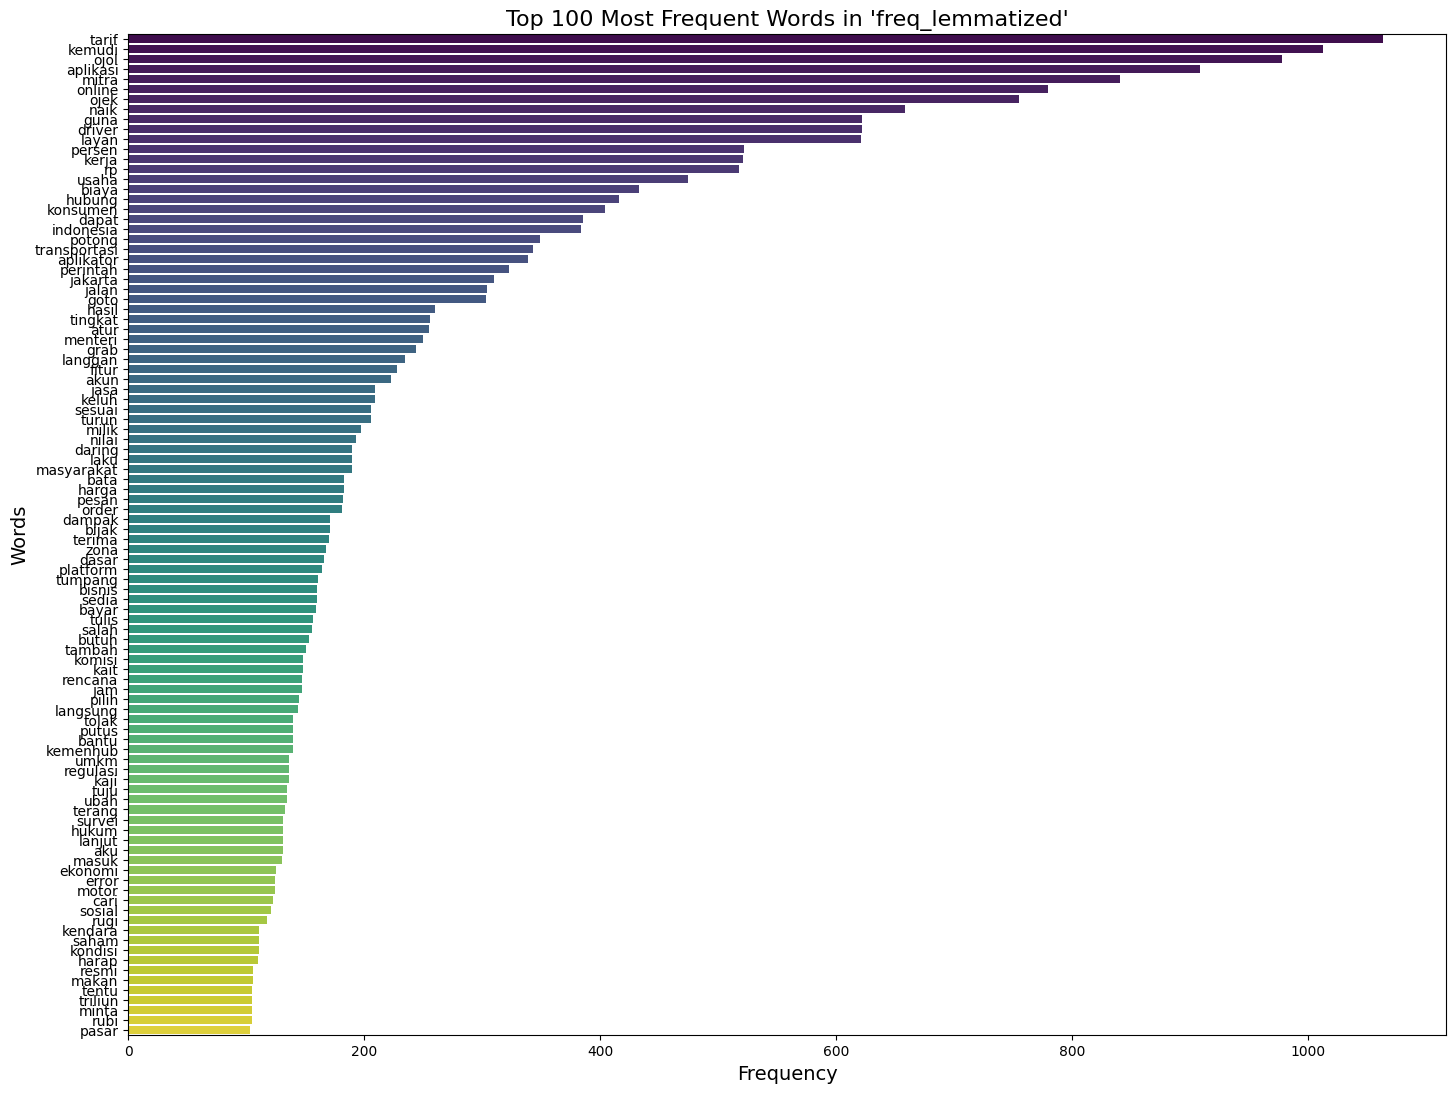

In [71]:
# Ambil top 100 kata yang paling sering muncul
top_n = 100
top_words = freq_lemmatized.head(top_n)

# Plot hasil frekuensi kata
plt.figure(figsize=(17, 13))
sns.barplot(x='count', y='word', data=top_words, palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in 'freq_lemmatized'", fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()

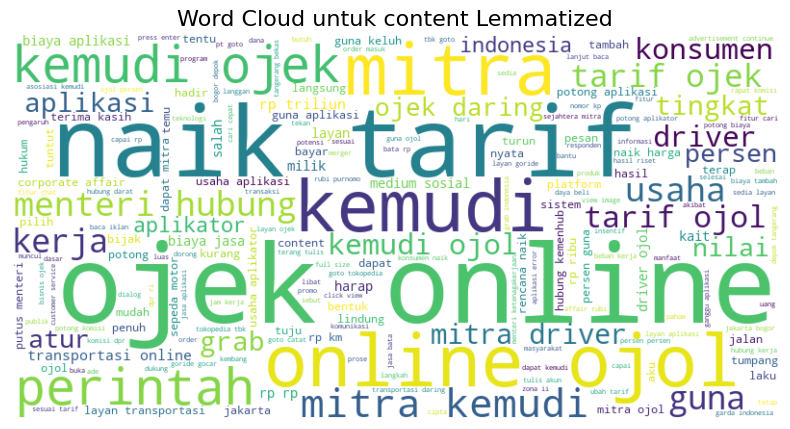

In [72]:
wordcloud_lemmatized = WordCloud(width=800, height=400, background_color='white').generate(' '.join(gojek_news_df_with_gojek['content_lemmatized']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_lemmatized, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk content Lemmatized', fontsize=16)
plt.show()


In [73]:
# Hitung frekuensi untuk kolom 'content_lemmatized'
freq_lemmatized_without_gojek = get_word_frequencies(gojek_news_df_without_gojek['content_lemmatized'])
freq_lemmatized_without_gojek.sort_values(by='count', ascending=False, inplace=True)

/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/2716112172.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words_without_gojek, palette='viridis')


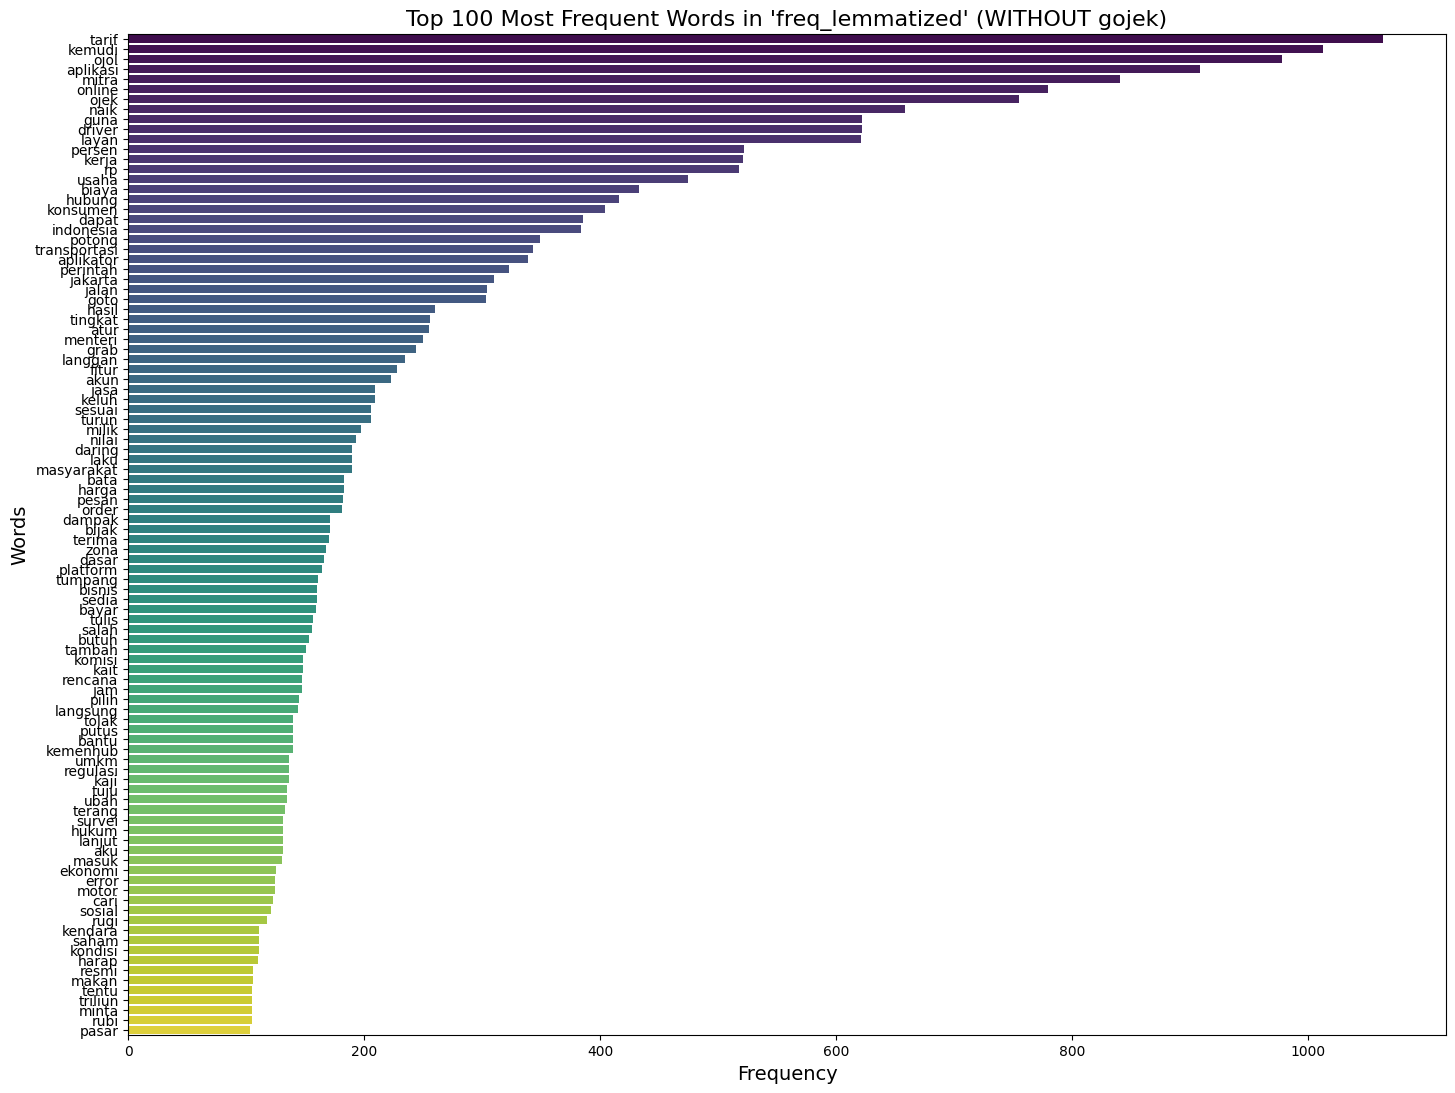

In [74]:
# Ambil top 100 kata yang paling sering muncul dari data TANPA gojek
top_n = 100
top_words_without_gojek = freq_lemmatized_without_gojek.head(top_n)

# Plot hasil frekuensi kata
plt.figure(figsize=(17, 13))
sns.barplot(x='count', y='word', data=top_words_without_gojek, palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in 'freq_lemmatized' (WITHOUT gojek)", fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()


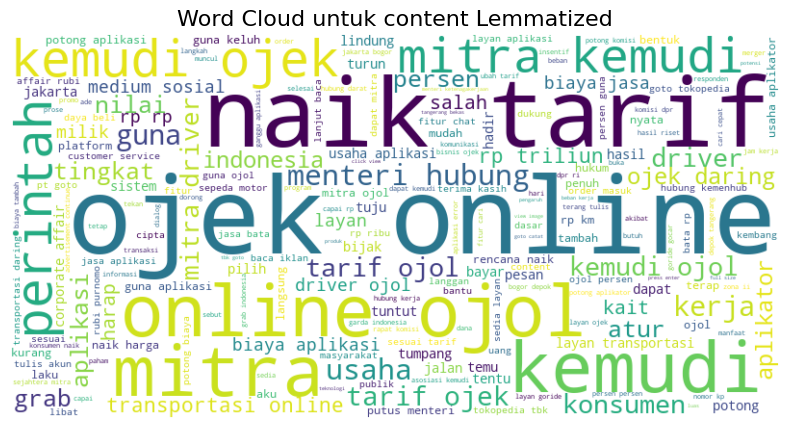

In [75]:
wordcloud_lemmatized = WordCloud(width=800, height=400, background_color='white').generate(' '.join(gojek_news_df_without_gojek['content_lemmatized']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_lemmatized, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk content Lemmatized', fontsize=16)
plt.show()


In [76]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'gojek_news_df_after_stopwords_lemm.csv'
gojek_news_df_with_gojek.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke gojek_news_df_after_stopwords_lemm.csv


In [77]:
# Menyimpan DataFrame ke file Excel
gojek_news_df_with_gojek.to_excel('gojek_news_df_after_stopwords_lemm.xlsx', index=False)

# Pesan untuk memastikan file tersimpan
print("DataFrame berhasil disimpan ke gojek_news_df_after_stopwords_lemm.xlsx")

DataFrame berhasil disimpan ke gojek_news_df_after_stopwords_lemm.xlsx


In [78]:
gojek_news_df_with_gojek

link  \
0    https://beritajatim.com/tarif-ojol-naik-15-per...   
1    https://gizmologi.id/news/survei-tolak-kenaika...   
2    https://katadata.co.id/digital/startup/63c159e...   
3    https://katadata.co.id/digital/startup/64df003...   
4    https://kumparan.com/odjie-samroji/nasib-penge...   
..                                                 ...   
295  https://www.gojek.com/blog/gojek/update-fitur-...   
296  https://www.liputan6.com/tekno/read/5523551/wa...   
297  https://kumparan.com/kumparanbisnis/koalisi-oj...   
298  https://www.kompas.com/tren/read/2023/12/13/07...   
299  https://www.cnnindonesia.com/ekonomi/202507021...   

                                                 judul       penerbit  \
0           pakar transportasi ingatkan dampak negatif    Beritajatim   
1              survei tolak kenaikan tarif ojol online      Gizmologi   
2    aplikasi __gojek__ error, warganet keluhkan sa...       katadata   
3    riset hampir driver ojol kerja tanpa libur, ja...       Katadata   
4    nasib pengemudi ojol online, antara harapan da...       kumparan   
..                                                 ...            ...   
295  kirim pesan lebih praktis dengan update fitur ...     Gojek Blog   
296  warganet keluhkan aplikasi __gojek__ error di ...   Liputan6.com   
297  koalisi ojol nasional tolak wacana merger grab...       kumparan   
298  driver __gojek__ bisa nilai customer, ini risi...     Kompas.com   
299  kemenhub ralat soal tarif ojol naik persen, se...  CNN Indonesia   

       tanggal                                            content  \
0   2025-02-07  Yogyakarta (beritajatim.com)– Pemerintah melal...   
1   2025-02-03  Jakarta, Gizmologi – Pemerintah telah menetapk...   
2          NaT  Sejumlah warganet mengeluhkan aplikasi Gojek y...   
3          NaT  Hampir 50% pengemudi ojek online atau ojol bek...   
4          NaT  Satu hal yang tak bisa dipungkiri adalah bahwa...   
..         ...                                                ...   
295        NaT  Hai Gojekers,\n\n\n\nUpdate fitur chat terbaru...   
296 2024-07-02  Liputan6.com, Jakarta - Sejumlah warganet rama...   
297        NaT  “Bagi para pengemudi ojek online (ojol) dan mi...   
298        NaT  KOMPAS.com - Sebuah unggahan yang menyatakan p...   
299 2025-03-03  --\n\nDirjen Perhubungan Darat Kementerian Per...   

                                       cleaned_content   tahun  wordCount  \
0    yogyakarta pemerintah melalui kementerian perh...  2025.0        328   
1    jakarta gizmologi pemerintah telah menetapkan ...  2025.0        385   
2    sejumlah warganet mengeluhkan aplikasi gojek y...     NaN        298   
3    hampir pengemudi ojek online atau ojol bekerja...     NaN        250   
4    satu hal yang tak bisa dipungkiri adalah bahwa...     NaN         87   
..                                                 ...     ...        ...   
295  hai gojekers update fitur chat terbaru yang di...     NaN        343   
296  jakarta sejumlah warganet ramai mengeluhkan ap...  2024.0        102   
297  bagi para pengemudi ojek online ojol dan mitra...     NaN         39   
298  sebuah unggahan yang menyatakan penumpang ojek...     NaN        295   
299  dirjen perhubungan darat kementerian perhubung...  2025.0        255   

                             content_without_stopwords  \
0    yogyakarta pemerintah kementerian perhubungan ...   
1    jakarta gizmologi pemerintah menetapkan kenaik...   
2    warganet mengeluhkan aplikasi eror keluhankelu...   
3    pengemudi ojek online ojol libur sepekan berda...   
4    dipungkiri pengemudi ojol tulang punggung laya...   
..                                                 ...   
295  hai gojekers update fitur chat terbaru ditungg...   
296  jakarta warganet ramai mengeluhkan aplikasi er...   
297  pengemudi ojek online ojol mitra penjual merge...   
298  unggahan penumpang ojek online ojol rating nil...   
299  dirjen perhubungan darat kementerian perhubung...   

     wordcount_after_stop

##Rare Words & Common Words Removal

In [79]:
from collections import Counter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# 1. Fungsi untuk menghitung frekuensi kata (sudah benar)
def get_word_frequencies(corpus):
    all_words = ' '.join(corpus).split()
    return Counter(all_words)

# 2. Fungsi rare word removal + common word removal (diperbarui)
def remove_rare_common_words(text, word_freq, rare_threshold=5, common_threshold=100):
    words = text.split()
    filtered_words = [
        word for word in words
        if rare_threshold <= word_freq.get(word, 0) <= common_threshold
    ]
    return ' '.join(filtered_words)

# 3. Hitung frekuensi kata dari kolom yang sudah diproses
word_frequencies = get_word_frequencies(gojek_news_df_with_gojek['content_lemmatized'])

# 4. Tentukan threshold (penyesuaian berdasarkan distribusi frekuensi)
print("Distribusi Frekuensi Kata:")
print(pd.Series(dict(word_frequencies.most_common(10))))  # Lihat 10 kata paling umum

rare_threshold = 10      # Kata muncul minimal 10x
common_threshold = 3000   # Kata muncul maksimal 50x (untuk hindari kata umum berlebihan)

# 5. Apply rare + common word removal
gojek_news_df_with_gojek['filtered_content'] = gojek_news_df_with_gojek['content_lemmatized'].apply(
    lambda x: remove_rare_common_words(x, word_frequencies, rare_threshold, common_threshold)
)

# 6. Analisis hasil
print("\nKata yang dihapus (terlalu langka/umum):")
rare_words = [word for word, count in word_frequencies.items() if count < rare_threshold]
common_words = [word for word, count in word_frequencies.items() if count > common_threshold]
print(f"- Rare words (count < {rare_threshold}): {len(rare_words)} kata")
print(f"- Common words (count > {common_threshold}): {len(common_words)} kata")

Distribusi Frekuensi Kata:
tarif       1064
kemudi      1013
ojol         978
aplikasi     909
mitra        841
online       780
ojek         755
naik         659
guna         622
driver       622
dtype: int64

Kata yang dihapus (terlalu langka/umum):
- Rare words (count < 10): 3426 kata
- Common words (count > 3000): 0 kata


In [80]:
# Menampilkan hasil untuk beberapa baris
gojek_news_df_with_gojek.loc[0:3, ['content_lemmatized', 'filtered_content']]

content_lemmatized  \
0  yogyakarta perintah menteri hubung bijak naik ...   
1  jakarta gizmologi perintah tetap naik tarif oj...   
2  warganet keluh aplikasi eror keluhankeluhan tu...   
3  kemudi ojek online ojol libur pek dasar survei...   

                                    filtered_content  
0  yogyakarta perintah menteri hubung bijak naik ...  
1  jakarta perintah tetap naik tarif ojek online ...  
2  warganet keluh aplikasi eror medium sosial twi...  
3  kemudi ojek online ojol libur pek dasar survei...

In [81]:
# Apply rare + common word removal
gojek_news_df_without_gojek['filtered_content'] = gojek_news_df_without_gojek['content_lemmatized'].apply(
    lambda x: remove_rare_common_words(x, word_frequencies, rare_threshold, common_threshold)
)

# 6. Analisis hasil
print("\nKata yang dihapus (terlalu langka/umum):")
rare_words = [word for word, count in word_frequencies.items() if count < rare_threshold]
common_words = [word for word, count in word_frequencies.items() if count > common_threshold]
print(f"- Rare words (count < {rare_threshold}): {len(rare_words)} kata")
print(f"- Common words (count > {common_threshold}): {len(common_words)} kata")


Kata yang dihapus (terlalu langka/umum):
- Rare words (count < 10): 3426 kata
- Common words (count > 3000): 0 kata


In [82]:
# Function to calculate word frequencies and return as DataFrame
def get_word_frequencies(text_series):
    # Combine all text into one string and split into words
    all_words = ' '.join(text_series.astype(str)).split()
    # Count word frequencies
    word_counts = Counter(all_words)
    # Convert to DataFrame
    freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
    return freq_df

In [83]:
# Calculate frequencies for filtered_content
freq_filtered = get_word_frequencies(gojek_news_df_with_gojek['filtered_content'])
freq_filtered.sort_values(by='count', ascending=False, inplace=True)


/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/2788354976.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words_filtered, palette='viridis')


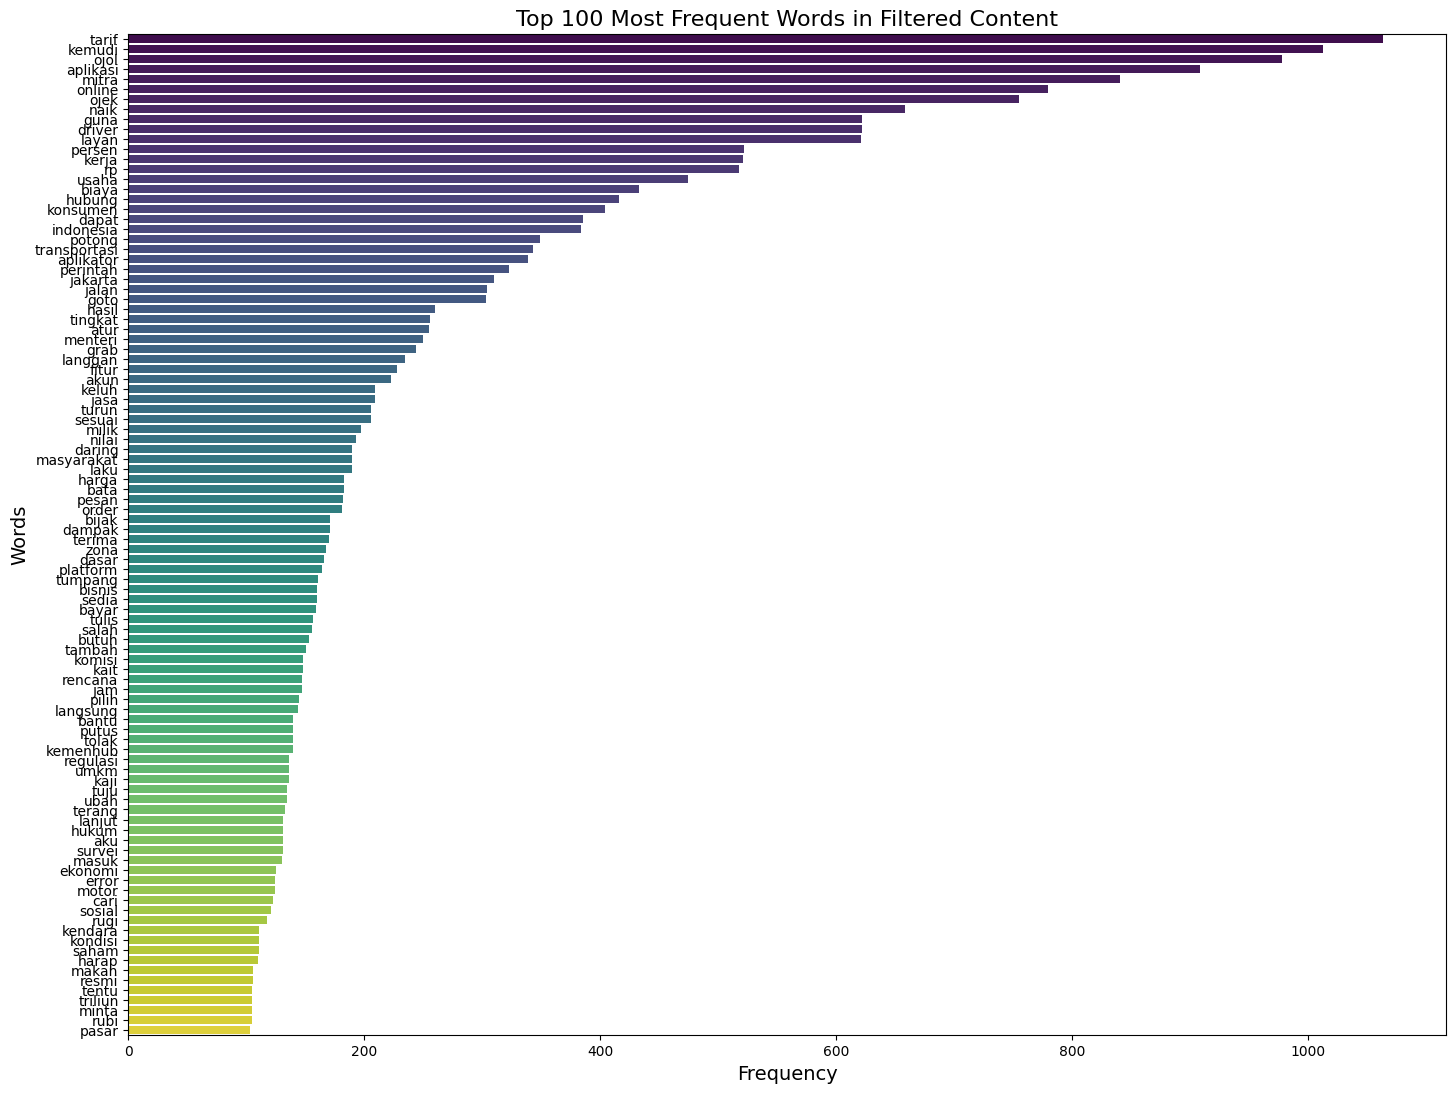

In [84]:

# Get top 100 most frequent words
top_n = 100
top_words_filtered = freq_filtered.head(top_n)

# Plot frequency distribution
plt.figure(figsize=(17, 13))
sns.barplot(x='count', y='word', data=top_words_filtered, palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in Filtered Content", fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()


In [85]:
# Melihat keseluruhan baris

# Mengatur pandas agar menampilkan seluruh baris DataFrame
pd.set_option('display.max_rows', None)

# Menampilkan seluruh isi DataFrame
print(top_words_filtered)

# Setelah selesai, Anda bisa mengembalikan pengaturan agar hanya menampilkan sebagian baris
pd.reset_option('display.max_rows')

             word  count
6           tarif   1064
23         kemudi   1013
9            ojol    978
196      aplikasi    909
22          mitra    841
8          online    780
7            ojek    755
5            naik    659
21           guna    622
227        driver    622
262         layan    621
10         persen    522
66          kerja    521
466            rp    518
24          usaha    475
194         biaya    433
3          hubung    416
44       konsumen    404
57          dapat    386
61      indonesia    384
229        potong    349
34   transportasi    343
25      aplikator    339
1        perintah    323
130       jakarta    310
48          jalan    304
85           goto    303
67          hasil    260
154       tingkat    256
94           atur    255
2         menteri    250
84           grab    244
274       langgan    235
253         fitur    228
237          akun    223
218         keluh    209
195          jasa    209
54          turun    206
11         sesuai    206


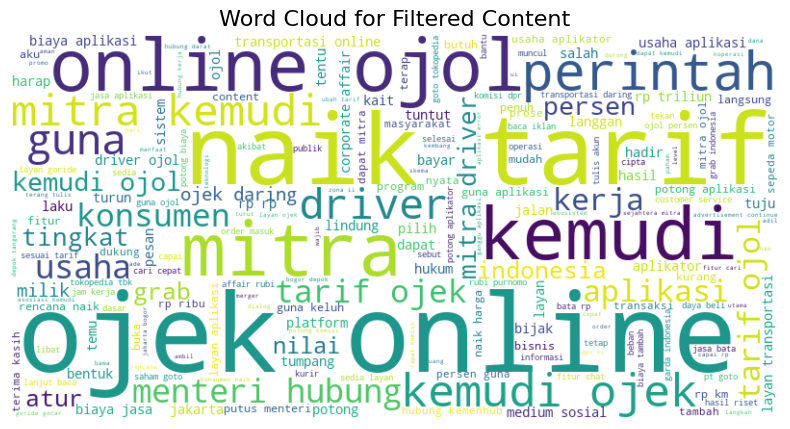

In [86]:
# Create word cloud for filtered content
wordcloud_filtered = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200
).generate(' '.join(gojek_news_df_with_gojek['filtered_content'].astype(str)))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Filtered Content', fontsize=16)
plt.show()

In [87]:
# Calculate frequencies for filtered_content pada dataframe tanpa gojek
freq_filtered_without_gojek = get_word_frequencies(gojek_news_df_without_gojek['filtered_content'])
freq_filtered_without_gojek.sort_values(by='count', ascending=False, inplace=True)


/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/3464762017.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words_filtered_without_gojek, palette='viridis')


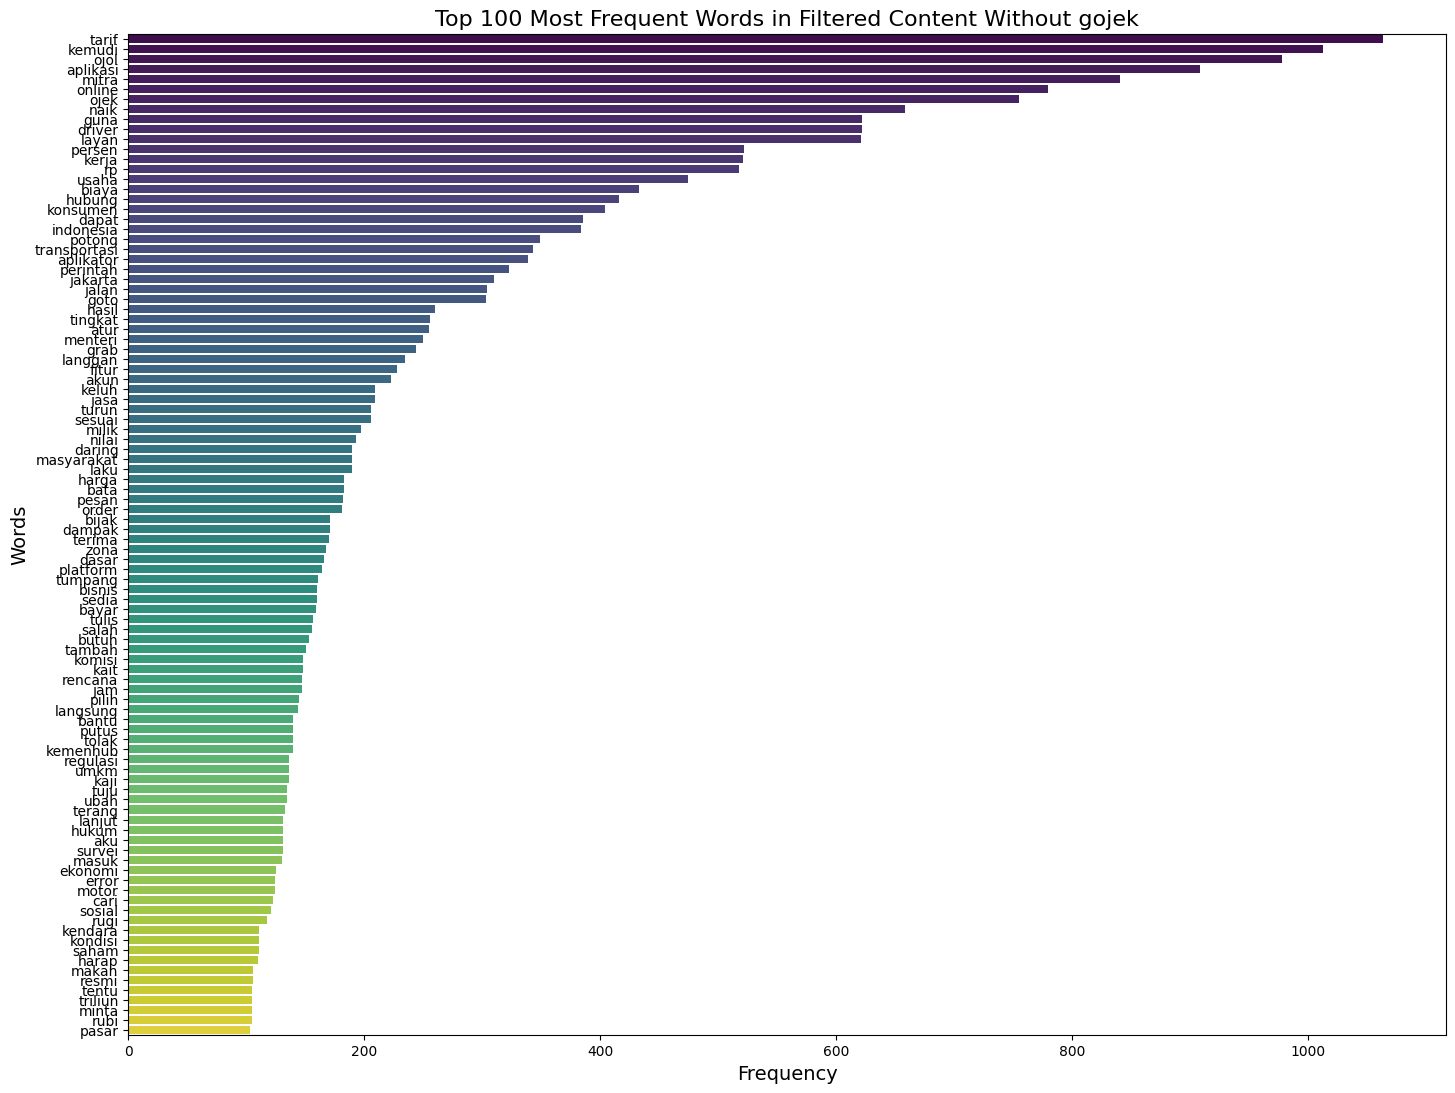

In [88]:
# Get top 100 most frequent words
top_n = 100
top_words_filtered_without_gojek = freq_filtered_without_gojek.head(top_n)

# Plot frequency distribution
plt.figure(figsize=(17, 13))
sns.barplot(x='count', y='word', data=top_words_filtered_without_gojek, palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in Filtered Content Without gojek", fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()


In [89]:
# Mengatur pandas agar menampilkan seluruh baris DataFrame
pd.set_option('display.max_rows', None)

# Menampilkan seluruh isi DataFrame
print(top_words_filtered_without_gojek)

# Setelah selesai, kembalikan pengaturan agar hanya menampilkan sebagian baris
pd.reset_option('display.max_rows')


             word  count
6           tarif   1064
23         kemudi   1013
9            ojol    978
196      aplikasi    909
22          mitra    841
8          online    780
7            ojek    755
5            naik    659
21           guna    622
227        driver    622
262         layan    621
10         persen    522
66          kerja    521
466            rp    518
24          usaha    475
194         biaya    433
3          hubung    416
44       konsumen    404
57          dapat    386
61      indonesia    384
229        potong    349
34   transportasi    343
25      aplikator    339
1        perintah    323
130       jakarta    310
48          jalan    304
85           goto    303
67          hasil    260
154       tingkat    256
94           atur    255
2         menteri    250
84           grab    244
274       langgan    235
253         fitur    228
237          akun    223
218         keluh    209
195          jasa    209
54          turun    206
11         sesuai    206


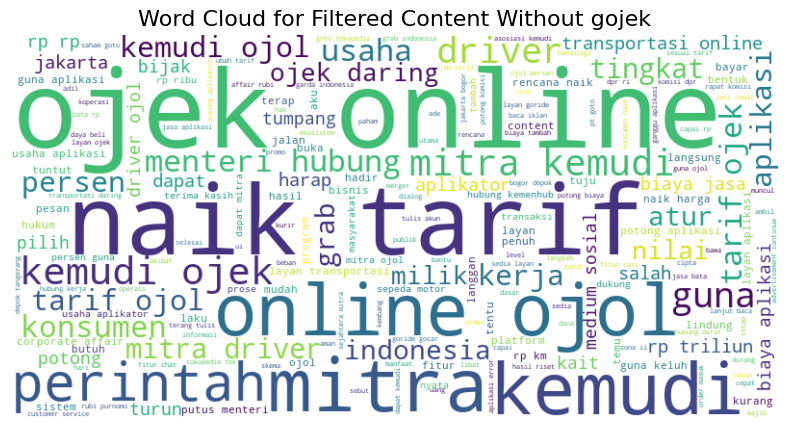

In [90]:
# Create word cloud for filtered content without gojek
wordcloud_filtered_without_gojek = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200
).generate(' '.join(gojek_news_df_without_gojek['filtered_content'].astype(str)))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_filtered_without_gojek, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Filtered Content Without gojek', fontsize=16)
plt.show()


In [91]:
# Menyimpan DataFrame ke dalam file CSV
file_path = 'gojek_news_df_after_stopwords_lemm_filtered.csv'
gojek_news_df_with_gojek.to_csv(file_path, index=False)

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke gojek_news_df_after_stopwords_lemm_filtered.csv


In [92]:
# Menyimpan DataFrame ke file Excel
gojek_news_df_with_gojek.to_excel('gojek_news_df_after_stopwords_lemm_filtered.xlsx', index=False)

# Pesan untuk memastikan file tersimpan
print("DataFrame berhasil disimpan ke gojek_news_df_after_stopwords_lemm_filtered.xlsx")

DataFrame berhasil disimpan ke gojek_news_df_after_stopwords_lemm_filtered.xlsx


In [93]:
gojek_news_df_with_gojek.loc[:,['judul', 'content', 'wordCount', 'filtered_content']]

judul  \
0           pakar transportasi ingatkan dampak negatif   
1              survei tolak kenaikan tarif ojol online   
2    aplikasi __gojek__ error, warganet keluhkan sa...   
3    riset hampir driver ojol kerja tanpa libur, ja...   
4    nasib pengemudi ojol online, antara harapan da...   
..                                                 ...   
295  kirim pesan lebih praktis dengan update fitur ...   
296  warganet keluhkan aplikasi __gojek__ error di ...   
297  koalisi ojol nasional tolak wacana merger grab...   
298  driver __gojek__ bisa nilai customer, ini risi...   
299  kemenhub ralat soal tarif ojol naik persen, se...   

                                               content  wordCount  \
0    Yogyakarta (beritajatim.com)– Pemerintah melal...        328   
1    Jakarta, Gizmologi – Pemerintah telah menetapk...        385   
2    Sejumlah warganet mengeluhkan aplikasi Gojek y...        298   
3    Hampir 50% pengemudi ojek online atau ojol bek...        250   
4    Satu hal yang tak bisa dipungkiri adalah bahwa...         87   
..                                                 ...        ...   
295  Hai Gojekers,\n\n\n\nUpdate fitur chat terbaru...        343   
296  Liputan6.com, Jakarta - Sejumlah warganet rama...        102   
297  “Bagi para pengemudi ojek online (ojol) dan mi...         39   
298  KOMPAS.com - Sebuah unggahan yang menyatakan p...        295   
299  --\n\nDirjen Perhubungan Darat Kementerian Per...        255   

                                      filtered_content  
0    yogyakarta perintah menteri hubung bijak naik ...  
1    jakarta perintah tetap naik tarif ojek online ...  
2    warganet keluh aplikasi eror medium sosial twi...  
3    kemudi ojek online ojol libur pek dasar survei...  
4    kemudi ojol punggung layan antar tumpang antar...  
..                                                 ...  
295  update fitur chat baru tunggu hadir aplikasi f...  
296  jakarta warganet ramai keluh aplikasi error me...  
297  kemudi ojek online ojol mitra jual merger damp...  
298  unggah tumpang ojek online ojol rating nilai b...  
299  dirjen hubung darat menteri hubung kemenhub aa...  

[300 rows x 4 columns]

## Sentiment Analysis Setelah Preprocessing

In [94]:
!pip install nltk
!pip install transformers

In [95]:
import torch
print("PyTorch version:", torch.__version__)
print("MPS available:", torch.backends.mps.is_available())
print("MPS built:", torch.backends.mps.is_built())


PyTorch version: 2.9.0
MPS available: True
MPS built: True


In [96]:
# ==========================================
# 🔧 Setup & Import
# ==========================================
import torch  # ⬅️ penting: ini harus diimpor dulu sebelum pipeline
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from transformers import pipeline
import pandas as pd
from collections import Counter

# ==========================================
# ⚙️ Device Auto-Detection (MPS / CPU)
# ==========================================
device = 0 if torch.backends.mps.is_available() else -1
print(f"🚀 Running on {'Apple MPS GPU' if device == 0 else 'CPU'}")

# ==========================================
# 🤖 Load IndoBERT Sentiment Model
# ==========================================
classifier = pipeline(
    "sentiment-analysis",
    model="w11wo/indonesian-roberta-base-sentiment-classifier",
    device=device
)

# ==========================================
# ✂️ Fungsi bantu
# ==========================================
def chunk_text(text, max_words=270):
    """Memotong teks panjang menjadi beberapa bagian agar tidak melebihi batas model."""
    tokens = word_tokenize(text)
    for i in range(0, len(tokens), max_words):
        yield ' '.join(tokens[i:i + max_words])

def analyze_sentiment_with_chunking(text):
    """Menganalisis sentimen teks panjang dengan metode chunking."""
    if not isinstance(text, str) or len(text.strip()) == 0:
        return pd.Series(["neutral", 0.0])

    chunks = list(chunk_text(text))
    results = classifier(chunks)

    # Hitung label dominan
    label_counts = Counter([res['label'] for res in results])
    final_label = label_counts.most_common(1)[0][0]

    # Hitung rata-rata skor confidence
    avg_score = sum(res['score'] for res in results) / len(results)
    return pd.Series([final_label, avg_score])

# ==========================================
# 🚀 Jalankan analisis ke DataFrame
# ==========================================
target_column = "cleaned_content"  # ubah sesuai nama kolom kamu

gojek_news_df_with_gojek[['sentiment_label', 'sentiment_score']] = \
    gojek_news_df_with_gojek[target_column].apply(analyze_sentiment_with_chunking)

print("✅ Analisis sentimen selesai!")
gojek_news_df_with_gojek[['judul', target_column, 'sentiment_label', 'sentiment_score']].head()


🚀 Running on Apple MPS GPU


[nltk_data] Downloading package punkt to /Users/irfan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Device set to use mps:0


✅ Analisis sentimen selesai!


judul  \
0         pakar transportasi ingatkan dampak negatif   
1            survei tolak kenaikan tarif ojol online   
2  aplikasi __gojek__ error, warganet keluhkan sa...   
3  riset hampir driver ojol kerja tanpa libur, ja...   
4  nasib pengemudi ojol online, antara harapan da...   

                                     cleaned_content sentiment_label  \
0  yogyakarta pemerintah melalui kementerian perh...        negative   
1  jakarta gizmologi pemerintah telah menetapkan ...         neutral   
2  sejumlah warganet mengeluhkan aplikasi gojek y...        negative   
3  hampir pengemudi ojek online atau ojol bekerja...         neutral   
4  satu hal yang tak bisa dipungkiri adalah bahwa...        negative   

   sentiment_score  
0         0.611403  
1         0.997001  
2         0.889743  
3         0.992448  
4         0.744905

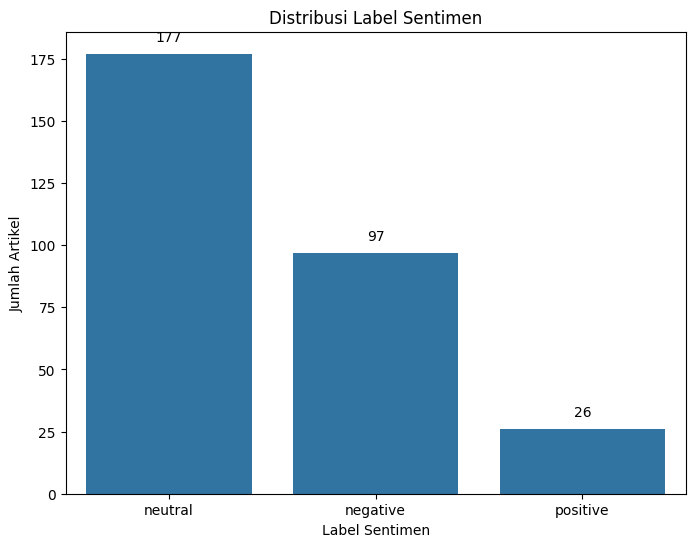

In [99]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x='sentiment_label',
    data=gojek_news_df_with_gojek,
    order=gojek_news_df_with_gojek['sentiment_label'].value_counts().index
)
plt.title('Distribusi Label Sentimen')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Artikel')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # posisi tengah batang
        y=height + 5,                    # posisi sedikit di atas batang
        s=int(height),                   # teks jumlah frekuensi (integer)
        ha='center'                     # rata tengah secara horizontal
    )

plt.show()


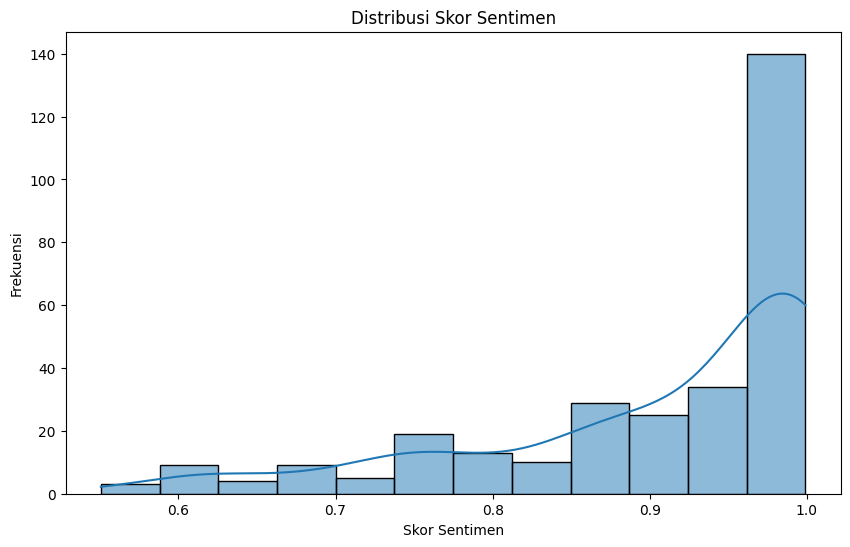

In [100]:
# Distribusi skor sentimen
plt.figure(figsize=(10, 6))
sns.histplot(gojek_news_df_with_gojek['sentiment_score'], kde=True)
plt.title('Distribusi Skor Sentimen')
plt.xlabel('Skor Sentimen')
plt.ylabel('Frekuensi')
plt.show()

## Sentiment Analysis berdasarkan penerbit

In [101]:
# Menghitung frekuensi penerbit
penerbit_freq = gojek_news_df_with_gojek['penerbit'].value_counts()

# Menampilkan hasil
print(penerbit_freq)

penerbit
Tempo.co                         34
kumparan                         21
liputan6                         19
detik                            17
cnnindonesia                     17
Bisnis.com                       13
CNN Indonesia                    11
Kompas.com                       10
kompas                           10
Detik Finance                     9
Katadata                          9
CNBC Indonesia                    9
Beritajatim                       8
Tempo                             8
Kompasiana                        7
Kompas.com​                       6
Metro TV News                     5
Tek.id                            5
Universitas Gadjah Mada (UGM)     5
Detik                             5
Sindo News                        4
Liputan6.com                      4
SuaraMerdeka                      4
Antara News                       4
Kompas.id                         3
Kumparan Tech                     3
Gojek Blog                        3
Marketing-Interacti

In [103]:
import calendar

# Pastikan kolom 'tanggal' dalam format datetime
gojek_news_df['tanggal'] = pd.to_datetime(gojek_news_df['tanggal'], errors='coerce')

# Ekstrak tahun dan bulan
gojek_news_df['bulan'] = gojek_news_df['tanggal'].dt.month

# Hitung jumlah berita per tahun dan bulan
berita_per_bulan = gojek_news_df.groupby(['tahun', 'bulan']).size().reset_index(name='jumlah_berita')

# Buat kolom periode (datetime) agar cocok untuk time series
berita_per_bulan['periode'] = pd.to_datetime(berita_per_bulan['tahun'].astype(str) + '-' + berita_per_bulan['bulan'].astype(str))

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=berita_per_bulan, x='periode', y='jumlah_berita', marker='o')

plt.title('Tren Jumlah Rilis Berita per Bulan', fontsize=14)
plt.xlabel('Waktu (Periode Bulanan)', fontsize=12)
plt.ylabel('Jumlah Berita', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Hitung jumlah berita per (tahun, bulan)
berita_per_bulan = gojek_news_df.groupby(['tahun', 'bulan']).size().reset_index(name='jumlah_berita')

# Ambil bulan dengan jumlah berita terbanyak di setiap tahun
top_bulan_per_tahun = berita_per_bulan.loc[berita_per_bulan.groupby('tahun')['jumlah_berita'].idxmax()]

# Tambahkan nama bulan
top_bulan_per_tahun['nama_bulan'] = top_bulan_per_tahun['bulan'].apply(lambda x: calendar.month_name[x])

# Urutkan berdasarkan tahun
top_bulan_per_tahun = top_bulan_per_tahun.sort_values('tahun')

# Tampilkan tabel hasil
print("\nJumlah berita terbanyak per bulan untuk setiap tahun:")
print(top_bulan_per_tahun[['tahun', 'nama_bulan', 'jumlah_berita']])

/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/3152450773.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  berita_per_bulan['periode'] = pd.to_datetime(berita_per_bulan['tahun'].astype(str) + '-' + berita_per_bulan['bulan'].astype(str))


DateParseError: Unknown datetime string format, unable to parse: 2018.0-6.0, at position 0

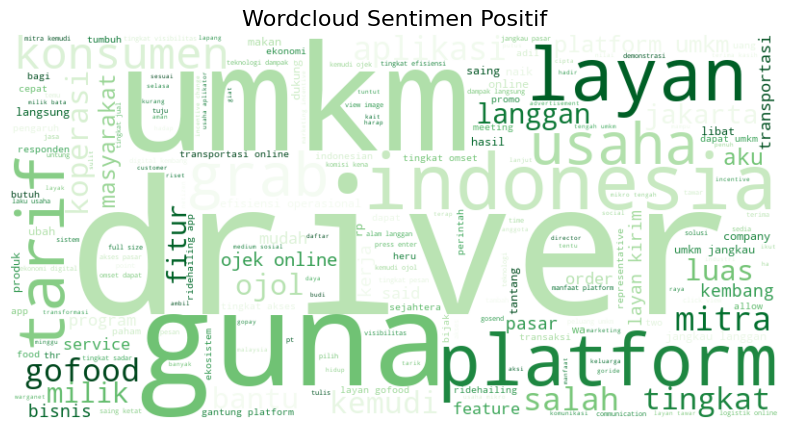

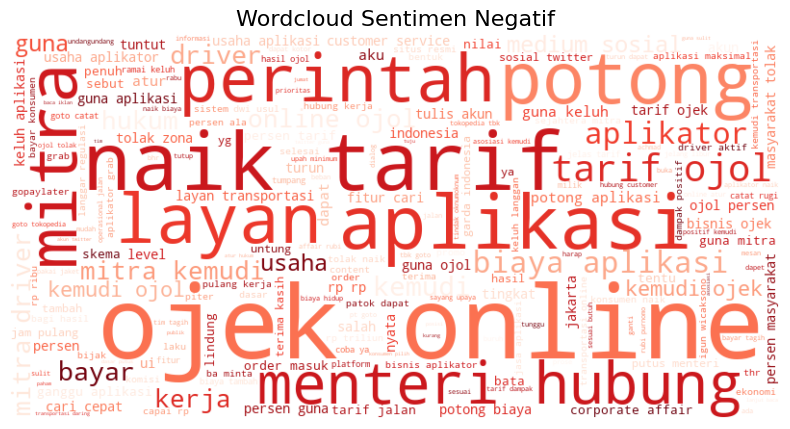

In [104]:
# WordCloud per sentimen
positive_words = ' '.join(gojek_news_df_with_gojek[gojek_news_df_with_gojek['sentiment_label'] == 'positive']['filtered_content'])
negative_words = ' '.join(gojek_news_df_with_gojek[gojek_news_df_with_gojek['sentiment_label'] == 'negative']['filtered_content'])

# Wordcloud positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Positif', fontsize=16)
plt.show()

# Wordcloud negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Negatif', fontsize=16)
plt.show()

/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/422449542.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=positive_df, palette='viridis')
/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/422449542.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=negative_df, palette='viridis')


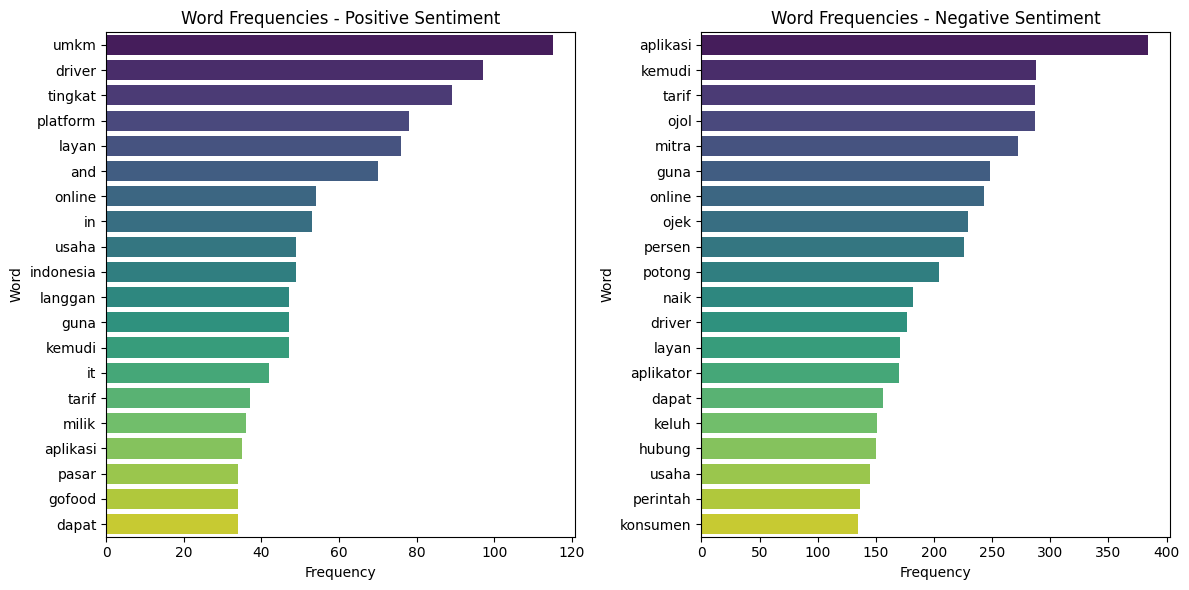

In [105]:

# Calculate word frequencies for positive and negative sentiments
positive_freq = Counter(" ".join(gojek_news_df_with_gojek[gojek_news_df_with_gojek['sentiment_label'] == 'positive']['filtered_content']).split())
negative_freq = Counter(" ".join(gojek_news_df_with_gojek[gojek_news_df_with_gojek['sentiment_label'] == 'negative']['filtered_content']).split())

# Convert to DataFrames
positive_df = pd.DataFrame(positive_freq.most_common(20), columns=['word', 'frequency'])
negative_df = pd.DataFrame(negative_freq.most_common(20), columns=['word', 'frequency'])

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='frequency', y='word', data=positive_df, palette='viridis')
plt.title('Word Frequencies - Positive Sentiment')
plt.xlabel("Frequency")
plt.ylabel("Word")

plt.subplot(1, 2, 2)
sns.barplot(x='frequency', y='word', data=negative_df, palette='viridis')
plt.title('Word Frequencies - Negative Sentiment')
plt.xlabel("Frequency")
plt.ylabel("Word")

plt.tight_layout()
plt.show()


In [106]:
gojek_news_df_with_gojek[['filtered_content', 'sentiment_label', 'sentiment_score']]

filtered_content sentiment_label  \
0    yogyakarta perintah menteri hubung bijak naik ...        negative   
1    jakarta perintah tetap naik tarif ojek online ...         neutral   
2    warganet keluh aplikasi eror medium sosial twi...        negative   
3    kemudi ojek online ojol libur pek dasar survei...         neutral   
4    kemudi ojol punggung layan antar tumpang antar...        negative   
..                                                 ...             ...   
295  update fitur chat baru tunggu hadir aplikasi f...         neutral   
296  jakarta warganet ramai keluh aplikasi error me...        negative   
297  kemudi ojek online ojol mitra jual merger damp...         neutral   
298  unggah tumpang ojek online ojol rating nilai b...         neutral   
299  dirjen hubung darat menteri hubung kemenhub aa...         neutral   

     sentiment_score  
0           0.611403  
1           0.997001  
2           0.889743  
3           0.992448  
4           0.744905  
..               ...  
295         0.717874  
296         0.939304  
297         0.996836  
298         0.629027  
299         0.986196  

[300 rows x 3 columns]

In [107]:
# Menyimpan DataFrame ke file Excel
gojek_news_df_with_gojek.to_excel('gojek_clean.xlsx', index=False)

# Pesan untuk memastikan file tersimpan
print("DataFrame berhasil disimpan ke gojek_clean.xlsx")

DataFrame berhasil disimpan ke gojek_clean.xlsx


In [108]:
# Menyimpan DataFrame ke file Excel
gojek_news_df_with_gojek.to_csv('gojek_clean.csv', index=False)

# Pesan untuk memastikan file tersimpan
print("DataFrame berhasil disimpan ke gojek_clean.csv")

DataFrame berhasil disimpan ke gojek_clean.csv


##Sentiment analysis without ikn


In [109]:
# Terapkan sentiment analysis pada data tanpa gojek
gojek_news_df_without_gojek[['sentiment_label', 'sentiment_score']] = gojek_news_df_without_gojek['filtered_content'].apply(analyze_sentiment_with_chunking)

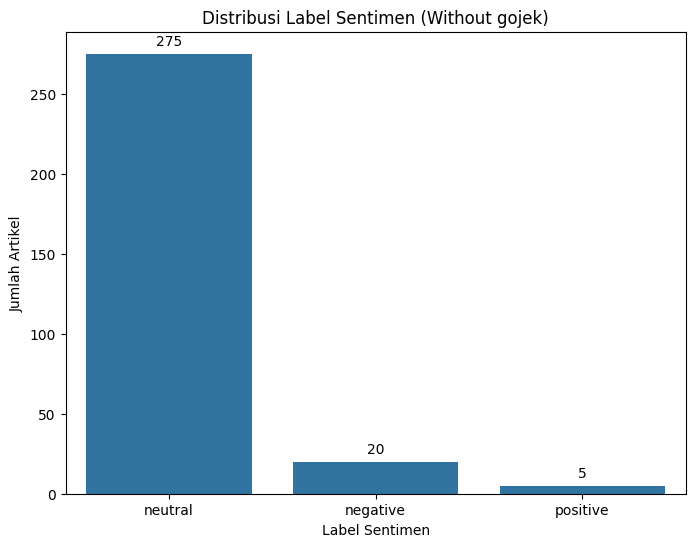

In [111]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x='sentiment_label',
    data=gojek_news_df_without_gojek,
    order=gojek_news_df_without_gojek['sentiment_label'].value_counts().index
)
plt.title('Distribusi Label Sentimen (Without gojek)')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Artikel')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 5,
        s=int(height),
        ha='center'
    )

plt.show()


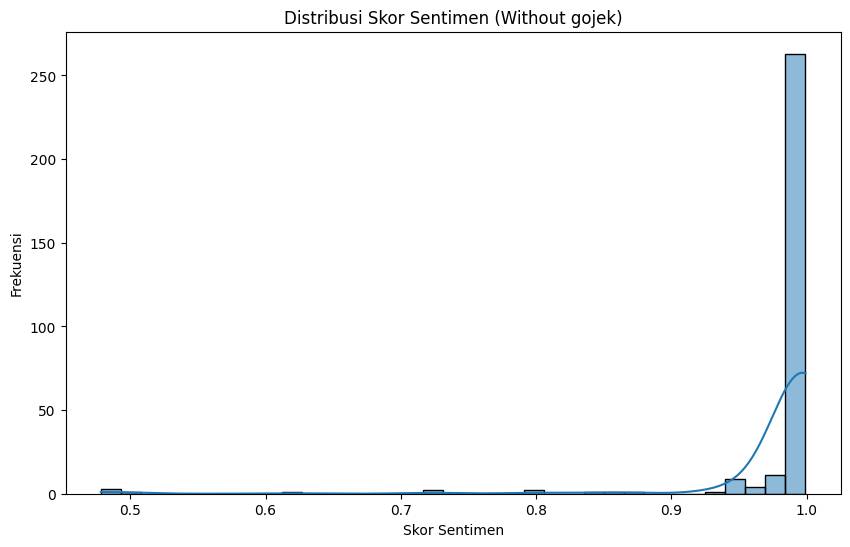

In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(gojek_news_df_without_gojek['sentiment_score'], kde=True)
plt.title('Distribusi Skor Sentimen (Without gojek)')
plt.xlabel('Skor Sentimen')
plt.ylabel('Frekuensi')
plt.show()


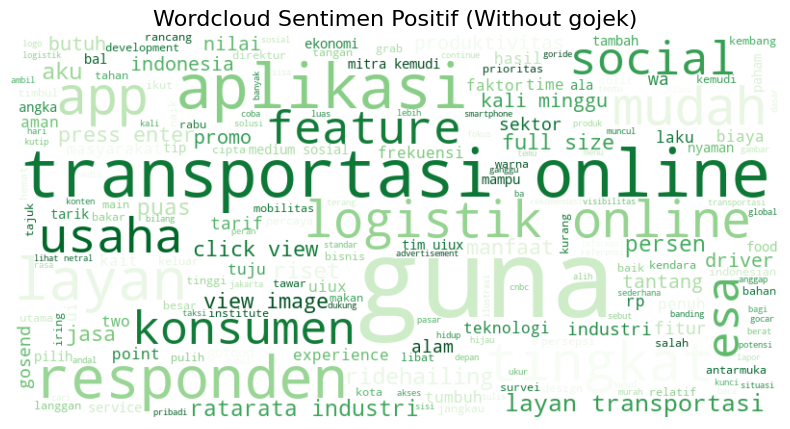

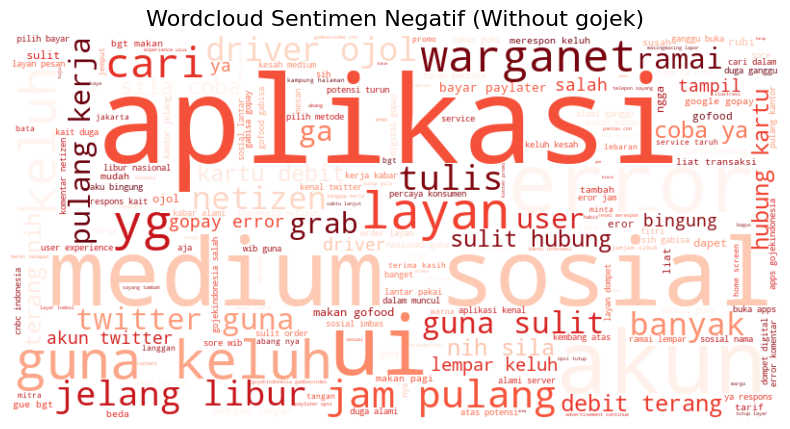

In [113]:
positive_words_wo = ' '.join(gojek_news_df_without_gojek[gojek_news_df_without_gojek['sentiment_label'] == 'positive']['filtered_content'])
negative_words_wo = ' '.join(gojek_news_df_without_gojek[gojek_news_df_without_gojek['sentiment_label'] == 'negative']['filtered_content'])

# Wordcloud positif tanpa gojek
wordcloud_positive_wo = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_words_wo)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive_wo, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Positif (Without gojek)', fontsize=16)
plt.show()

# Wordcloud negatif tanpa gojek
wordcloud_negative_wo = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_words_wo)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative_wo, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Negatif (Without gojek)', fontsize=16)
plt.show()


/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/2273740926.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=positive_df_wo, palette='viridis')
/var/folders/77/vv2j_079111byz0tpny0xplc0000gp/T/ipykernel_72865/2273740926.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=negative_df_wo, palette='viridis')


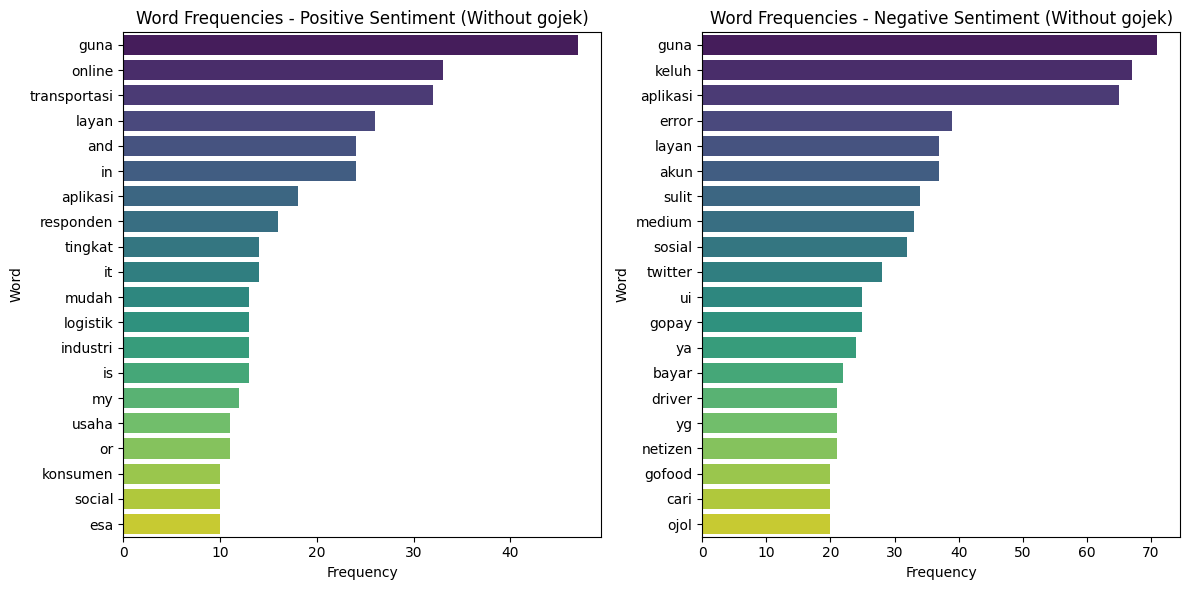

In [114]:
positive_freq_wo = Counter(" ".join(gojek_news_df_without_gojek[gojek_news_df_without_gojek['sentiment_label'] == 'positive']['filtered_content']).split())
negative_freq_wo = Counter(" ".join(gojek_news_df_without_gojek[gojek_news_df_without_gojek['sentiment_label'] == 'negative']['filtered_content']).split())

positive_df_wo = pd.DataFrame(positive_freq_wo.most_common(20), columns=['word', 'frequency'])
negative_df_wo = pd.DataFrame(negative_freq_wo.most_common(20), columns=['word', 'frequency'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='frequency', y='word', data=positive_df_wo, palette='viridis')
plt.title('Word Frequencies - Positive Sentiment (Without gojek)')
plt.xlabel("Frequency")
plt.ylabel("Word")

plt.subplot(1, 2, 2)
sns.barplot(x='frequency', y='word', data=negative_df_wo, palette='viridis')
plt.title('Word Frequencies - Negative Sentiment (Without gojek)')
plt.xlabel("Frequency")
plt.ylabel("Word")

plt.tight_layout()
plt.show()


In [115]:
# Menyimpan DataFrame ke file Excel
gojek_news_df_without_gojek.to_excel('gojek_clean_without_gojek.xlsx', index=False)

# Pesan untuk memastikan file tersimpan
print("DataFrame berhasil disimpan ke gojek_clean_without_gojek.xlsx")

DataFrame berhasil disimpan ke gojek_clean_without_gojek.xlsx


In [116]:
# Menyimpan DataFrame ke file Excel
gojek_news_df_without_gojek.to_csv('gojek_clean_without_gojek.csv', index=False)

# Pesan untuk memastikan file tersimpan
print("DataFrame berhasil disimpan ke gojek_clean_without_gojek.csv")

DataFrame berhasil disimpan ke gojek_clean_without_gojek.csv
